In [288]:
!pip install googletrans==4.0.0-rc1

In [1]:
import pandas as pd
import numpy as np

In [175]:
df_1 = pd.read_csv('yt_scraped_comments_dreen.csv')


In [176]:
df_2 = pd.read_csv('youtube_comments_full.csv')

In [177]:
df_1 = df_1.drop(columns=['Unnamed: 0'])

In [178]:
df_1.head()

text             published  \
0  UR MY LIL SODA POP UR ALL I CAN THINK OF UR AL...  2025-09-07T14:08:44Z   
1  Sasabihin ng mga Dd5 "basta tama ang message" ...  2025-08-27T16:09:04Z   
2  MICHAEL V. NABIKTIMA NG DEEPFAKE VIDEO NA NAG ...  2025-07-15T19:00:41Z   
3                                Prg black mirror na  2025-06-18T04:33:24Z   
4  napanood ko to grabe sa untrained eyes tlgang ...  2025-06-14T02:16:50Z   

                 author  like_count     video_id  is_reply  
0  @MildredCarpio-fx5my           0  QGlitcqjKyM     False  
1       @highwizard6764           0  QGlitcqjKyM     False  
2   @SuperCarlitoFtGold           0  QGlitcqjKyM     False  
3           @Tenchua917           0  QGlitcqjKyM     False  
4  @joaquintabanera8439           0  QGlitcqjKyM     False

In [179]:
df_1.shape

(1392, 6)

In [180]:
df_2.head()

videoId                   commentId parentId  isReply  \
0  3IyL-MK5XfQ  UgzoMou5t4ytm9uQx5h4AaABAg      NaN    False   
1  3IyL-MK5XfQ  Ugwm_adXrX78pPhy0WN4AaABAg      NaN    False   
2  3IyL-MK5XfQ  Ugw1O8eAsIh0VpLQo0h4AaABAg      NaN    False   
3  3IyL-MK5XfQ  UgxsGdVGY5PN1Wm9zXp4AaABAg      NaN    False   
4  3IyL-MK5XfQ  UgxAJEMr9RrJ5N0VJGh4AaABAg      NaN    False   

                  author                                               text  \
0   @kingcarloskilat6394           FAKE NEWS AI video\n\nEDSA 4 is WAVING .   
1        @chardborja8486  What you expect with these empty shells ? all ...   
2  @geneveivecabildo5260                                       TR@YD0R BATO   
3              @Gord4728  Manuel mas OK ang AI kaysa mga communista na s...   
4          @Jigglypuff33  Pinandigan nalang ni Bato ang kabobohan nya Ha...   

            publishedAt  likeCount  text_length  
0  2025-06-16T06:44:15Z          0           38  
1  2025-06-16T06:44:53Z          0           73  
2  2025-06-16T06:45:07Z          0           12  
3  2025-06-16T06:50:12Z          0           86  
4  2025-06-16T06:56:18Z         92           53

In [181]:
df_2.shape

(2871, 9)

In [182]:
df_2 = df_2.drop(columns=['commentId','parentId','text_length'])

In [183]:
df_2 = df_2.rename(columns = {'publishedAt':'published','isReply':'is_reply','videoId':'video_id','likeCount':'like_count'})

In [184]:
df_2.head()

video_id  is_reply                 author  \
0  3IyL-MK5XfQ     False   @kingcarloskilat6394   
1  3IyL-MK5XfQ     False        @chardborja8486   
2  3IyL-MK5XfQ     False  @geneveivecabildo5260   
3  3IyL-MK5XfQ     False              @Gord4728   
4  3IyL-MK5XfQ     False          @Jigglypuff33   

                                                text             published  \
0           FAKE NEWS AI video\n\nEDSA 4 is WAVING .  2025-06-16T06:44:15Z   
1  What you expect with these empty shells ? all ...  2025-06-16T06:44:53Z   
2                                       TR@YD0R BATO  2025-06-16T06:45:07Z   
3  Manuel mas OK ang AI kaysa mga communista na s...  2025-06-16T06:50:12Z   
4  Pinandigan nalang ni Bato ang kabobohan nya Ha...  2025-06-16T06:56:18Z   

   like_count  
0           0  
1           0  
2           0  
3           0  
4          92

In [185]:
df_final = pd.concat([df_1, df_2], ignore_index=True)

In [186]:
df_final.tail()


text             published  \
4258                                               true  2025-06-01T11:23:57Z   
4259                @@khoroshoigra8388 true, also a dev  2025-06-01T11:25:35Z   
4260                                   true, also a dev  2025-06-01T11:25:41Z   
4261  @@denniszenanywhere true. there's a company th...  2025-06-01T11:27:58Z   
4262                         Jollibee is always Hiring.  2025-07-24T11:58:00Z   

                author  like_count     video_id  is_reply  
4258      @mackysig_ph           0  x4SvP-Ne-uY      True  
4259      @mackysig_ph           0  x4SvP-Ne-uY      True  
4260      @mackysig_ph           1  x4SvP-Ne-uY      True  
4261      @mackysig_ph           0  x4SvP-Ne-uY      True  
4262  @danieldilao7827           0  x4SvP-Ne-uY     False

In [187]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4263 entries, 0 to 4262
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        4263 non-null   object
 1   published   4263 non-null   object
 2   author      4260 non-null   object
 3   like_count  4263 non-null   int64 
 4   video_id    4250 non-null   object
 5   is_reply    4263 non-null   bool  
dtypes: bool(1), int64(1), object(4)
memory usage: 170.8+ KB


In [188]:
df_final = df_final[['author', 'text', 'published', 'like_count', 'video_id', 'is_reply']]

In [189]:
df_final['video_id'].replace(np.nan,'QGlitcqjKyM',inplace= True)

C:\Users\Andreen Gonzaga\AppData\Local\Temp\ipykernel_41496\2148343210.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final['video_id'].replace(np.nan,'QGlitcqjKyM',inplace= True)


In [190]:
df_final[pd.isna(df_final['author'])]

author                                               text  \
2233    NaN  The key in the natural evolution of the BPO in...   
2234    NaN  For BPO, the Philippines has a clear advantage...   
4181    NaN  Jobs will be lost and other gained.  If the PH...   

                 published  like_count     video_id  is_reply  
2233  2025-01-05T06:22:36Z           2  83so3TTFjlg     False  
2234  2025-01-05T06:34:08Z           0  83so3TTFjlg     False  
4181  2025-01-05T18:59:14Z           2  x4SvP-Ne-uY     False

In [191]:
df = df_final.copy()

In [192]:
df.head()

author                                               text  \
0  @MildredCarpio-fx5my  UR MY LIL SODA POP UR ALL I CAN THINK OF UR AL...   
1       @highwizard6764  Sasabihin ng mga Dd5 "basta tama ang message" ...   
2   @SuperCarlitoFtGold  MICHAEL V. NABIKTIMA NG DEEPFAKE VIDEO NA NAG ...   
3           @Tenchua917                                Prg black mirror na   
4  @joaquintabanera8439  napanood ko to grabe sa untrained eyes tlgang ...   

              published  like_count     video_id  is_reply  
0  2025-09-07T14:08:44Z           0  QGlitcqjKyM     False  
1  2025-08-27T16:09:04Z           0  QGlitcqjKyM     False  
2  2025-07-15T19:00:41Z           0  QGlitcqjKyM     False  
3  2025-06-18T04:33:24Z           0  QGlitcqjKyM     False  
4  2025-06-14T02:16:50Z           0  QGlitcqjKyM     False

In [193]:
df['text'] = df['text'].astype(str)

In [194]:
import pandas as pd

In [289]:
df = pd.read_csv('youtube_comments_for_analysis_translated.csv')

In [290]:
df.duplicated().any()


False

In [291]:
df_nlp = df.copy()
df_nlp.head()

author                                               text  \
0  @MildredCarpio-fx5my  UR MY LIL SODA POP UR ALL I CAN THINK OF UR AL...   
1       @highwizard6764  Sasabihin ng mga Dd5 "basta tama ang message" ...   
2   @SuperCarlitoFtGold  MICHAEL V. NABIKTIMA NG DEEPFAKE VIDEO NA NAG ...   
3           @Tenchua917                                Prg black mirror na   
4  @joaquintabanera8439  napanood ko to grabe sa untrained eyes tlgang ...   

                                     translated_text             published  \
0  UR MY LIL SODA POP UR ALL I CAN THINK OF UR AL...  2025-09-07T14:08:44Z   
1  Dd5s will say "as long as the message is corre...  2025-08-27T16:09:04Z   
2    MICHAEL V. VICTIM OF DEEPFAKE VIDEO ENDORSEMENT  2025-07-15T19:00:41Z   
3                                Prg black mirror na  2025-06-18T04:33:24Z   
4  I watched it so badly with untrained eyes that...  2025-06-14T02:16:50Z   

   like_count     video_id  is_reply  
0           0  QGlitcqjKyM     False  
1           0  QGlitcqjKyM     False  
2           0  QGlitcqjKyM     False  
3           0  QGlitcqjKyM     False  
4           0  QGlitcqjKyM     False

In [292]:
df_nlp

author                                               text  \
0     @MildredCarpio-fx5my  UR MY LIL SODA POP UR ALL I CAN THINK OF UR AL...   
1          @highwizard6764  Sasabihin ng mga Dd5 "basta tama ang message" ...   
2      @SuperCarlitoFtGold  MICHAEL V. NABIKTIMA NG DEEPFAKE VIDEO NA NAG ...   
3              @Tenchua917                                Prg black mirror na   
4     @joaquintabanera8439  napanood ko to grabe sa untrained eyes tlgang ...   
...                    ...                                                ...   
4258          @mackysig_ph                                               TRUE   
4259          @mackysig_ph                @@khoroshoigra8388 true, also a dev   
4260          @mackysig_ph                                   true, also a dev   
4261          @mackysig_ph  @@denniszenanywhere true. there's a company th...   
4262      @danieldilao7827                         Jollibee is always Hiring.   

                                        translated_text             published  \
0     UR MY LIL SODA POP UR ALL I CAN THINK OF UR AL...  2025-09-07T14:08:44Z   
1     Dd5s will say "as long as the message is corre...  2025-08-27T16:09:04Z   
2       MICHAEL V. VICTIM OF DEEPFAKE VIDEO ENDORSEMENT  2025-07-15T19:00:41Z   
3                                   Prg black mirror na  2025-06-18T04:33:24Z   
4     I watched it so badly with untrained eyes that...  2025-06-14T02:16:50Z   
...                                                 ...                   ...   
4258                                               TRUE  2025-06-01T11:23:57Z   
4259                @@khoroshoigra8388 true, also a dev  2025-06-01T11:25:35Z   
4260                                   true, also a dev  2025-06-01T11:25:41Z   
4261  @@denniszenanywhere true. there's a company th...  2025-06-01T11:27:58Z   
4262                         Jollibee is always Hiring.  2025-07-24T11:58:00Z   

      like_count     video_id  is_reply  
0              0  QGlitcqjKyM     False  
1              0  QGlitcqjKyM     False  
2              0  QGlitcqjKyM     False  
3              0  QGlitcqjKyM     False  
4              0  QGlitcqjKyM     False  
...          ...          ...       ...  
4258           0  x4SvP-Ne-uY      True  
4259           0  x4SvP-Ne-uY      True  
4260           1  x4SvP-Ne-uY      True  
4261           0  x4SvP-Ne-uY      True  
4262           0  x4SvP-Ne-uY     False  

[4263 rows x 7 columns]

In [293]:
df_nlp = df_nlp[['like_count','video_id','translated_text','published']]

In [295]:
# # Create an empty list to store the labels
# video_labels = []
# keyword = ['Google Gemini Philippines', 'Artificial Intelligence Philippines', 'ChatGPT Philippines', 'Data Science Philippines', 'Deepfake Philippines']
# # Loop through each video_id and assign value
# for video in df_nlp['video_id']:
#     if video == ('l34hAuvJkYk',):
#         video_labels.append(keyword[0])
#     elif video == ('bEbPosDpz2k'):
#         video_labels.append(keyword[1])
#     elif video == 'bEbPosDpz2k':
#         video_labels.append(keyword[2])
#     elif video == ('cLj48tIar_Ko'):
#         video_labels.append(keyword[3])
#     else:
#         video_labels.append(keyword[4])  # Default if not matched

# # Add to the DataFrame
# df_nlp['video_label'] = video_labels


In [296]:
df_nlp.head()

like_count     video_id                                    translated_text  \
0           0  QGlitcqjKyM  UR MY LIL SODA POP UR ALL I CAN THINK OF UR AL...   
1           0  QGlitcqjKyM  Dd5s will say "as long as the message is corre...   
2           0  QGlitcqjKyM    MICHAEL V. VICTIM OF DEEPFAKE VIDEO ENDORSEMENT   
3           0  QGlitcqjKyM                                Prg black mirror na   
4           0  QGlitcqjKyM  I watched it so badly with untrained eyes that...   

              published  
0  2025-09-07T14:08:44Z  
1  2025-08-27T16:09:04Z  
2  2025-07-15T19:00:41Z  
3  2025-06-18T04:33:24Z  
4  2025-06-14T02:16:50Z

In [2]:
# Import libraries for nltk preprocessing
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string
from nltk import pos_tag
nltk.download('punkt_tab')
nltk.download('punkt') # Downloads the Punkt tokenizer models
nltk.download('stopwords') # Downloads the list of stopwords
nltk.download('wordnet') # Downloads the WordNet lemmatizer data

[nltk_data] Downloading package punkt_tab to C:\Users\Andreen
[nltk_data]     Gonzaga\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Andreen
[nltk_data]     Gonzaga\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Andreen
[nltk_data]     Gonzaga\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Andreen
[nltk_data]     Gonzaga\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [298]:
def tokenize_text(text):
    return word_tokenize(text)

#Apply tokenization
df_nlp['tokens'] = df_nlp['translated_text'].apply(tokenize_text)
df_nlp.head()

C:\Users\Andreen Gonzaga\AppData\Local\Temp\ipykernel_41496\3582730864.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nlp['tokens'] = df_nlp['translated_text'].apply(tokenize_text)


like_count     video_id                                    translated_text  \
0           0  QGlitcqjKyM  UR MY LIL SODA POP UR ALL I CAN THINK OF UR AL...   
1           0  QGlitcqjKyM  Dd5s will say "as long as the message is corre...   
2           0  QGlitcqjKyM    MICHAEL V. VICTIM OF DEEPFAKE VIDEO ENDORSEMENT   
3           0  QGlitcqjKyM                                Prg black mirror na   
4           0  QGlitcqjKyM  I watched it so badly with untrained eyes that...   

              published                                             tokens  
0  2025-09-07T14:08:44Z  [UR, MY, LIL, SODA, POP, UR, ALL, I, CAN, THIN...  
1  2025-08-27T16:09:04Z  [Dd5s, will, say, ``, as, long, as, the, messa...  
2  2025-07-15T19:00:41Z  [MICHAEL, V., VICTIM, OF, DEEPFAKE, VIDEO, END...  
3  2025-06-18T04:33:24Z                           [Prg, black, mirror, na]  
4  2025-06-14T02:16:50Z  [I, watched, it, so, badly, with, untrained, e...

In [299]:
stop_words = set(stopwords.words('english'))
stop_words
# # Define function for noise removal
def remove_stopwords_punctuation_noise(tokens):
    return [word for word in tokens if word.lower() not in stop_words
            and word not in string.punctuation] # alternatively, word.isalnum()

# # Apply noise removal
df_nlp['tokens_no_stopwords'] = df_nlp['tokens'].apply(
    remove_stopwords_punctuation_noise
)

df_nlp.head()

C:\Users\Andreen Gonzaga\AppData\Local\Temp\ipykernel_41496\414428323.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nlp['tokens_no_stopwords'] = df_nlp['tokens'].apply(


like_count     video_id                                    translated_text  \
0           0  QGlitcqjKyM  UR MY LIL SODA POP UR ALL I CAN THINK OF UR AL...   
1           0  QGlitcqjKyM  Dd5s will say "as long as the message is corre...   
2           0  QGlitcqjKyM    MICHAEL V. VICTIM OF DEEPFAKE VIDEO ENDORSEMENT   
3           0  QGlitcqjKyM                                Prg black mirror na   
4           0  QGlitcqjKyM  I watched it so badly with untrained eyes that...   

              published                                             tokens  \
0  2025-09-07T14:08:44Z  [UR, MY, LIL, SODA, POP, UR, ALL, I, CAN, THIN...   
1  2025-08-27T16:09:04Z  [Dd5s, will, say, ``, as, long, as, the, messa...   
2  2025-07-15T19:00:41Z  [MICHAEL, V., VICTIM, OF, DEEPFAKE, VIDEO, END...   
3  2025-06-18T04:33:24Z                           [Prg, black, mirror, na]   
4  2025-06-14T02:16:50Z  [I, watched, it, so, badly, with, untrained, e...   

                                 tokens_no_stopwords  
0  [UR, LIL, SODA, POP, UR, THINK, UR, NEED, LIL,...  
1  [Dd5s, say, ``, long, message, correct, '', AI...  
2  [MICHAEL, V., VICTIM, DEEPFAKE, VIDEO, ENDORSE...  
3                           [Prg, black, mirror, na]  
4    [watched, badly, untrained, eyes, seemed, real]

In [300]:
# Set up PorterStemmer
ps = PorterStemmer()

# Define a function for stemming
def stem_tokens(tokens):
    return [ps.stem(word) for word in tokens]

# Apply stemming
df_nlp['stemmed_tokens'] = df_nlp['tokens_no_stopwords'].apply(stem_tokens)
df_nlp.head()

like_count     video_id                                    translated_text  \
0           0  QGlitcqjKyM  UR MY LIL SODA POP UR ALL I CAN THINK OF UR AL...   
1           0  QGlitcqjKyM  Dd5s will say "as long as the message is corre...   
2           0  QGlitcqjKyM    MICHAEL V. VICTIM OF DEEPFAKE VIDEO ENDORSEMENT   
3           0  QGlitcqjKyM                                Prg black mirror na   
4           0  QGlitcqjKyM  I watched it so badly with untrained eyes that...   

              published                                             tokens  \
0  2025-09-07T14:08:44Z  [UR, MY, LIL, SODA, POP, UR, ALL, I, CAN, THIN...   
1  2025-08-27T16:09:04Z  [Dd5s, will, say, ``, as, long, as, the, messa...   
2  2025-07-15T19:00:41Z  [MICHAEL, V., VICTIM, OF, DEEPFAKE, VIDEO, END...   
3  2025-06-18T04:33:24Z                           [Prg, black, mirror, na]   
4  2025-06-14T02:16:50Z  [I, watched, it, so, badly, with, untrained, e...   

                                 tokens_no_stopwords  \
0  [UR, LIL, SODA, POP, UR, THINK, UR, NEED, LIL,...   
1  [Dd5s, say, ``, long, message, correct, '', AI...   
2  [MICHAEL, V., VICTIM, DEEPFAKE, VIDEO, ENDORSE...   
3                           [Prg, black, mirror, na]   
4    [watched, badly, untrained, eyes, seemed, real]   

                                      stemmed_tokens  
0  [ur, lil, soda, pop, ur, think, ur, need, lil,...  
1  [dd5, say, ``, long, messag, correct, '', ai, ...  
2      [michael, v., victim, deepfak, video, endors]  
3                           [prg, black, mirror, na]  
4           [watch, badli, untrain, eye, seem, real]

In [301]:
# Set up WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function for lemmatization
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

# Apply lemmatization
df_nlp['lemmatized_tokens'] = df_nlp['tokens_no_stopwords'].apply(lemmatize_tokens)
df_nlp.head()

like_count     video_id                                    translated_text  \
0           0  QGlitcqjKyM  UR MY LIL SODA POP UR ALL I CAN THINK OF UR AL...   
1           0  QGlitcqjKyM  Dd5s will say "as long as the message is corre...   
2           0  QGlitcqjKyM    MICHAEL V. VICTIM OF DEEPFAKE VIDEO ENDORSEMENT   
3           0  QGlitcqjKyM                                Prg black mirror na   
4           0  QGlitcqjKyM  I watched it so badly with untrained eyes that...   

              published                                             tokens  \
0  2025-09-07T14:08:44Z  [UR, MY, LIL, SODA, POP, UR, ALL, I, CAN, THIN...   
1  2025-08-27T16:09:04Z  [Dd5s, will, say, ``, as, long, as, the, messa...   
2  2025-07-15T19:00:41Z  [MICHAEL, V., VICTIM, OF, DEEPFAKE, VIDEO, END...   
3  2025-06-18T04:33:24Z                           [Prg, black, mirror, na]   
4  2025-06-14T02:16:50Z  [I, watched, it, so, badly, with, untrained, e...   

                                 tokens_no_stopwords  \
0  [UR, LIL, SODA, POP, UR, THINK, UR, NEED, LIL,...   
1  [Dd5s, say, ``, long, message, correct, '', AI...   
2  [MICHAEL, V., VICTIM, DEEPFAKE, VIDEO, ENDORSE...   
3                           [Prg, black, mirror, na]   
4    [watched, badly, untrained, eyes, seemed, real]   

                                      stemmed_tokens  \
0  [ur, lil, soda, pop, ur, think, ur, need, lil,...   
1  [dd5, say, ``, long, messag, correct, '', ai, ...   
2      [michael, v., victim, deepfak, video, endors]   
3                           [prg, black, mirror, na]   
4           [watch, badli, untrain, eye, seem, real]   

                                   lemmatized_tokens  
0  [UR, LIL, SODA, POP, UR, THINK, UR, NEED, LIL,...  
1  [Dd5s, say, ``, long, message, correct, '', AI...  
2  [MICHAEL, V., VICTIM, DEEPFAKE, VIDEO, ENDORSE...  
3                           [Prg, black, mirror, na]  
4     [watched, badly, untrained, eye, seemed, real]

In [302]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --- ------------------------------------ 1.0/12.8 MB 8.4 MB/s eta 0:00:02
     --------- ------------------------------ 3.1/12.8 MB 9.2 MB/s eta 0:00:02
     ------------------ --------------------- 5.8/12.8 MB 10.7 MB/s eta 0:00:01
     --------------------------- ------------ 8.7/12.8 MB 11.4 MB/s eta 0:00:01
     ----------------------------------- --- 11.8/12.8 MB 12.1 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 11.6 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [303]:
# Import SpaCy library and load pre-trained model
import spacy

nlp = spacy.load('en_core_web_sm')

In [304]:
# Define a function for tokenization
def spacy_tokenize_text(text):
    doc = nlp(text)
    return [token.text for token in doc]

# Apply tokenization
df_nlp['spacy_tokens'] = df_nlp['translated_text'].apply(spacy_tokenize_text)
df_nlp.head()

like_count     video_id                                    translated_text  \
0           0  QGlitcqjKyM  UR MY LIL SODA POP UR ALL I CAN THINK OF UR AL...   
1           0  QGlitcqjKyM  Dd5s will say "as long as the message is corre...   
2           0  QGlitcqjKyM    MICHAEL V. VICTIM OF DEEPFAKE VIDEO ENDORSEMENT   
3           0  QGlitcqjKyM                                Prg black mirror na   
4           0  QGlitcqjKyM  I watched it so badly with untrained eyes that...   

              published                                             tokens  \
0  2025-09-07T14:08:44Z  [UR, MY, LIL, SODA, POP, UR, ALL, I, CAN, THIN...   
1  2025-08-27T16:09:04Z  [Dd5s, will, say, ``, as, long, as, the, messa...   
2  2025-07-15T19:00:41Z  [MICHAEL, V., VICTIM, OF, DEEPFAKE, VIDEO, END...   
3  2025-06-18T04:33:24Z                           [Prg, black, mirror, na]   
4  2025-06-14T02:16:50Z  [I, watched, it, so, badly, with, untrained, e...   

                                 tokens_no_stopwords  \
0  [UR, LIL, SODA, POP, UR, THINK, UR, NEED, LIL,...   
1  [Dd5s, say, ``, long, message, correct, '', AI...   
2  [MICHAEL, V., VICTIM, DEEPFAKE, VIDEO, ENDORSE...   
3                           [Prg, black, mirror, na]   
4    [watched, badly, untrained, eyes, seemed, real]   

                                      stemmed_tokens  \
0  [ur, lil, soda, pop, ur, think, ur, need, lil,...   
1  [dd5, say, ``, long, messag, correct, '', ai, ...   
2      [michael, v., victim, deepfak, video, endors]   
3                           [prg, black, mirror, na]   
4           [watch, badli, untrain, eye, seem, real]   

                                   lemmatized_tokens  \
0  [UR, LIL, SODA, POP, UR, THINK, UR, NEED, LIL,...   
1  [Dd5s, say, ``, long, message, correct, '', AI...   
2  [MICHAEL, V., VICTIM, DEEPFAKE, VIDEO, ENDORSE...   
3                           [Prg, black, mirror, na]   
4     [watched, badly, untrained, eye, seemed, real]   

                                        spacy_tokens  
0  [UR, MY, LIL, SODA, POP, UR, ALL, I, CAN, THIN...  
1  [Dd5s, will, say, ", as, long, as, the, messag...  
2  [MICHAEL, V., VICTIM, OF, DEEPFAKE, VIDEO, END...  
3                           [Prg, black, mirror, na]  
4  [I, watched, it, so, badly, with, untrained, e...

In [305]:
# Define a function for noise removal
def spacy_remove_stopwords_punctuation(tokens):
    doc = spacy.tokens.Doc(nlp.vocab, words=tokens)
    return [token.text for token in doc if not token.is_stop
            and not token.is_punct]

# Apply removal of stop words and punctuation
df_nlp['spacy_tokens_no_stopwords'] = df_nlp['spacy_tokens'].apply(spacy_remove_stopwords_punctuation)
df_nlp.head()

like_count     video_id                                    translated_text  \
0           0  QGlitcqjKyM  UR MY LIL SODA POP UR ALL I CAN THINK OF UR AL...   
1           0  QGlitcqjKyM  Dd5s will say "as long as the message is corre...   
2           0  QGlitcqjKyM    MICHAEL V. VICTIM OF DEEPFAKE VIDEO ENDORSEMENT   
3           0  QGlitcqjKyM                                Prg black mirror na   
4           0  QGlitcqjKyM  I watched it so badly with untrained eyes that...   

              published                                             tokens  \
0  2025-09-07T14:08:44Z  [UR, MY, LIL, SODA, POP, UR, ALL, I, CAN, THIN...   
1  2025-08-27T16:09:04Z  [Dd5s, will, say, ``, as, long, as, the, messa...   
2  2025-07-15T19:00:41Z  [MICHAEL, V., VICTIM, OF, DEEPFAKE, VIDEO, END...   
3  2025-06-18T04:33:24Z                           [Prg, black, mirror, na]   
4  2025-06-14T02:16:50Z  [I, watched, it, so, badly, with, untrained, e...   

                                 tokens_no_stopwords  \
0  [UR, LIL, SODA, POP, UR, THINK, UR, NEED, LIL,...   
1  [Dd5s, say, ``, long, message, correct, '', AI...   
2  [MICHAEL, V., VICTIM, DEEPFAKE, VIDEO, ENDORSE...   
3                           [Prg, black, mirror, na]   
4    [watched, badly, untrained, eyes, seemed, real]   

                                      stemmed_tokens  \
0  [ur, lil, soda, pop, ur, think, ur, need, lil,...   
1  [dd5, say, ``, long, messag, correct, '', ai, ...   
2      [michael, v., victim, deepfak, video, endors]   
3                           [prg, black, mirror, na]   
4           [watch, badli, untrain, eye, seem, real]   

                                   lemmatized_tokens  \
0  [UR, LIL, SODA, POP, UR, THINK, UR, NEED, LIL,...   
1  [Dd5s, say, ``, long, message, correct, '', AI...   
2  [MICHAEL, V., VICTIM, DEEPFAKE, VIDEO, ENDORSE...   
3                           [Prg, black, mirror, na]   
4     [watched, badly, untrained, eye, seemed, real]   

                                        spacy_tokens  \
0  [UR, MY, LIL, SODA, POP, UR, ALL, I, CAN, THIN...   
1  [Dd5s, will, say, ", as, long, as, the, messag...   
2  [MICHAEL, V., VICTIM, OF, DEEPFAKE, VIDEO, END...   
3                           [Prg, black, mirror, na]   
4  [I, watched, it, so, badly, with, untrained, e...   

                           spacy_tokens_no_stopwords  
0  [UR, LIL, SODA, POP, UR, THINK, UR, NEED, LIL,...  
1       [Dd5s, long, message, correct, AI, ​​is, ok]  
2  [MICHAEL, V., VICTIM, DEEPFAKE, VIDEO, ENDORSE...  
3                           [Prg, black, mirror, na]  
4            [watched, badly, untrained, eyes, real]

In [306]:
# Define a function for lemmatization
def spacy_lemmatize_tokens(tokens):
    doc = nlp(' '.join(tokens))
    return [token.lemma_ for token in doc]

# Apply lemmatization
df_nlp['spacy_lemmatized_tokens'] = (
    df_nlp['spacy_tokens_no_stopwords'].apply(spacy_lemmatize_tokens)
)

df_nlp.head()

like_count     video_id                                    translated_text  \
0           0  QGlitcqjKyM  UR MY LIL SODA POP UR ALL I CAN THINK OF UR AL...   
1           0  QGlitcqjKyM  Dd5s will say "as long as the message is corre...   
2           0  QGlitcqjKyM    MICHAEL V. VICTIM OF DEEPFAKE VIDEO ENDORSEMENT   
3           0  QGlitcqjKyM                                Prg black mirror na   
4           0  QGlitcqjKyM  I watched it so badly with untrained eyes that...   

              published                                             tokens  \
0  2025-09-07T14:08:44Z  [UR, MY, LIL, SODA, POP, UR, ALL, I, CAN, THIN...   
1  2025-08-27T16:09:04Z  [Dd5s, will, say, ``, as, long, as, the, messa...   
2  2025-07-15T19:00:41Z  [MICHAEL, V., VICTIM, OF, DEEPFAKE, VIDEO, END...   
3  2025-06-18T04:33:24Z                           [Prg, black, mirror, na]   
4  2025-06-14T02:16:50Z  [I, watched, it, so, badly, with, untrained, e...   

                                 tokens_no_stopwords  \
0  [UR, LIL, SODA, POP, UR, THINK, UR, NEED, LIL,...   
1  [Dd5s, say, ``, long, message, correct, '', AI...   
2  [MICHAEL, V., VICTIM, DEEPFAKE, VIDEO, ENDORSE...   
3                           [Prg, black, mirror, na]   
4    [watched, badly, untrained, eyes, seemed, real]   

                                      stemmed_tokens  \
0  [ur, lil, soda, pop, ur, think, ur, need, lil,...   
1  [dd5, say, ``, long, messag, correct, '', ai, ...   
2      [michael, v., victim, deepfak, video, endors]   
3                           [prg, black, mirror, na]   
4           [watch, badli, untrain, eye, seem, real]   

                                   lemmatized_tokens  \
0  [UR, LIL, SODA, POP, UR, THINK, UR, NEED, LIL,...   
1  [Dd5s, say, ``, long, message, correct, '', AI...   
2  [MICHAEL, V., VICTIM, DEEPFAKE, VIDEO, ENDORSE...   
3                           [Prg, black, mirror, na]   
4     [watched, badly, untrained, eye, seemed, real]   

                                        spacy_tokens  \
0  [UR, MY, LIL, SODA, POP, UR, ALL, I, CAN, THIN...   
1  [Dd5s, will, say, ", as, long, as, the, messag...   
2  [MICHAEL, V., VICTIM, OF, DEEPFAKE, VIDEO, END...   
3                           [Prg, black, mirror, na]   
4  [I, watched, it, so, badly, with, untrained, e...   

                           spacy_tokens_no_stopwords  \
0  [UR, LIL, SODA, POP, UR, THINK, UR, NEED, LIL,...   
1       [Dd5s, long, message, correct, AI, ​​is, ok]   
2  [MICHAEL, V., VICTIM, DEEPFAKE, VIDEO, ENDORSE...   
3                           [Prg, black, mirror, na]   
4            [watched, badly, untrained, eyes, real]   

                             spacy_lemmatized_tokens  
0  [ur, LIL, SODA, POP, UR, think, ur, need, LIL,...  
1       [Dd5s, long, message, correct, AI, ​​is, ok]  
2  [MICHAEL, V., VICTIM, DEEPFAKE, video, endorse...  
3                           [prg, black, mirror, na]  
4               [watch, badly, untrained, eye, real]

In [307]:
df_analysis = df_nlp[['like_count','video_id','translated_text','lemmatized_tokens','spacy_lemmatized_tokens','published']]

In [308]:
df_analysis.head()

like_count     video_id                                    translated_text  \
0           0  QGlitcqjKyM  UR MY LIL SODA POP UR ALL I CAN THINK OF UR AL...   
1           0  QGlitcqjKyM  Dd5s will say "as long as the message is corre...   
2           0  QGlitcqjKyM    MICHAEL V. VICTIM OF DEEPFAKE VIDEO ENDORSEMENT   
3           0  QGlitcqjKyM                                Prg black mirror na   
4           0  QGlitcqjKyM  I watched it so badly with untrained eyes that...   

                                   lemmatized_tokens  \
0  [UR, LIL, SODA, POP, UR, THINK, UR, NEED, LIL,...   
1  [Dd5s, say, ``, long, message, correct, '', AI...   
2  [MICHAEL, V., VICTIM, DEEPFAKE, VIDEO, ENDORSE...   
3                           [Prg, black, mirror, na]   
4     [watched, badly, untrained, eye, seemed, real]   

                             spacy_lemmatized_tokens             published  
0  [ur, LIL, SODA, POP, UR, think, ur, need, LIL,...  2025-09-07T14:08:44Z  
1       [Dd5s, long, message, correct, AI, ​​is, ok]  2025-08-27T16:09:04Z  
2  [MICHAEL, V., VICTIM, DEEPFAKE, video, endorse...  2025-07-15T19:00:41Z  
3                           [prg, black, mirror, na]  2025-06-18T04:33:24Z  
4               [watch, badly, untrained, eye, real]  2025-06-14T02:16:50Z

In [309]:
df_last = df_analysis.copy()

In [343]:
df_last['len_tokens'] = df_last['lemmatized_tokens'].apply(len)
df_last['len_spacy_tokens'] = df_last['spacy_lemmatized_tokens'].apply(len)

In [344]:
avg_nltk = df_last['len_tokens'].mean()
avg_spacy = df_last['len_spacy_tokens'].mean()
print(f"Avg NLTK: {avg_nltk:.2f}, Avg SpaCy: {avg_spacy:.2f}")

Avg NLTK: 100.31, Avg SpaCy: 85.88


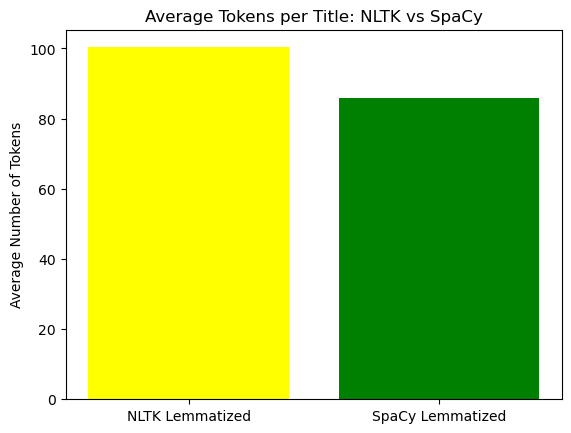

In [345]:
# ANSWER
import matplotlib.pyplot as plt

plt.bar(['NLTK Lemmatized', 'SpaCy Lemmatized'], [avg_nltk, avg_spacy], color=['yellow', 'green'])
plt.ylabel('Average Number of Tokens')
plt.title('Average Tokens per Title: NLTK vs SpaCy')
plt.show()

In [346]:
!pip install nltk wordcloud matplotlib

In [2]:
# for data load and wrangling
import pandas as pd

# for text preprocessing
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

nltk.download('stopwords') # Downloads the list of stopwords

# for visualizations
import matplotlib.pyplot as plt
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to C:\Users\Andreen
[nltk_data]     Gonzaga\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [348]:
df_analysis.head()

like_count     video_id                                    translated_text  \
0           0  QGlitcqjKyM  UR MY LIL SODA POP UR ALL I CAN THINK OF UR AL...   
1           0  QGlitcqjKyM  Dd5s will say "as long as the message is corre...   
2           0  QGlitcqjKyM    MICHAEL V. VICTIM OF DEEPFAKE VIDEO ENDORSEMENT   
3           0  QGlitcqjKyM                                Prg black mirror na   
4           0  QGlitcqjKyM  I watched it so badly with untrained eyes that...   

                                   lemmatized_tokens  \
0  ['UR', 'LIL', 'SODA', 'POP', 'UR', 'THINK', 'U...   
1  ['Dd5s', 'say', '``', 'long', 'message', 'corr...   
2  ['MICHAEL', 'V.', 'VICTIM', 'DEEPFAKE', 'VIDEO...   
3                   ['Prg', 'black', 'mirror', 'na']   
4  ['watched', 'badly', 'untrained', 'eye', 'seem...   

                             spacy_lemmatized_tokens             published  
0  ['ur', 'LIL', 'SODA', 'POP', 'UR', 'think', 'u...  2025-09-07T14:08:44Z  
1  ['Dd5s', 'long', 'message', 'correct', 'AI', '...  2025-08-27T16:09:04Z  
2  ['MICHAEL', 'V.', 'VICTIM', 'DEEPFAKE', 'video...  2025-07-15T19:00:41Z  
3                   ['prg', 'black', 'mirror', 'na']  2025-06-18T04:33:24Z  
4     ['watch', 'badly', 'untrained', 'eye', 'real']  2025-06-14T02:16:50Z

In [349]:
import ast
# Convert stringified lists to actual lists
df_last['lemmatized_tokens'] = df_last['lemmatized_tokens'].astype(str)
df_last['spacy_lemmatized_tokens'] = df_last['spacy_lemmatized_tokens'].astype(str)
df_last['lemmatized_tokens'] = df_last['lemmatized_tokens'].apply(ast.literal_eval)
df_last['spacy_lemmatized_tokens'] = df_last['spacy_lemmatized_tokens'].apply(ast.literal_eval)

In [350]:

# Convert list-type columns to tuples (only those that need it)
for col in df_last.columns:
    if df_last[col].apply(lambda x: isinstance(x, list)).any():
        df_last[col] = df_last[col].apply(tuple)

# Drop exact duplicate rows
df_last = df_last.drop_duplicates()


In [351]:
df_last.shape

(4197, 8)

In [352]:
# Flatten all tokens into a single list
titles_1_tokens = [token for sublist in df_last['lemmatized_tokens'] for token in sublist]
titles_1_tokens = [token for token in titles_1_tokens if token.isalpha() and len(token) > 1]
titles_1_text = ' '.join(titles_1_tokens)


In [353]:
titles_1_text

'UR LIL SODA POP UR THINK UR NEED LIL SODA POP LIL SODA POP say long message correct AI ok MICHAEL VICTIM DEEPFAKE VIDEO ENDORSEMENT Prg black mirror na watched badly untrained eye seemed real AI BAN charaters Voice AI Use voice instead Mel tiangco voice Investment scam scattered internet police one answer AI AI battle use AI detect manipulation beginning hopefully law abuse still early strange FB even report thing like account blocked immediately ASK FACEBOOK PERMISSION CONTROL FACEBOOK YOUTUBE SOCIAL MEDIA APPS CENSORED EVERY AI ENFORCEMENT SUSPECT use Artificial Intelligence evil spread technology evolves becomes scary good thing used also bad thing downside AI hope AI never go style platform banned Philippines many Shopee artist made endorser obvious see product handle equal sometimes first last reporting meta reply community policy independent fact checker anymore invented genius obobs point cyber crime AI AI NBI new technology catch picture Ai move turn video ai bad like matrix s

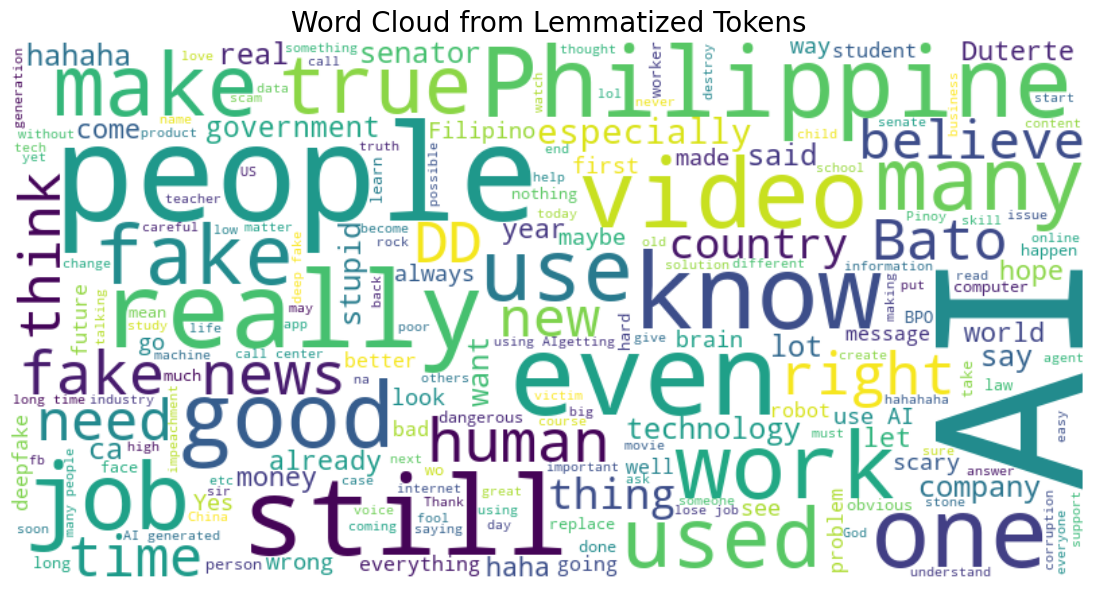

In [354]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(titles_1_text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud from Lemmatized Tokens", fontsize=20)
plt.show()


In [355]:
# Flatten all tokens into a single list
titles_2_tokens = [token for sublist in df_last['spacy_lemmatized_tokens'] for token in sublist]
titles_2_tokens = [token for token in titles_2_tokens if token.isalpha() and len(token) > 1]
titles_2_text = ' '.join(titles_2_tokens)


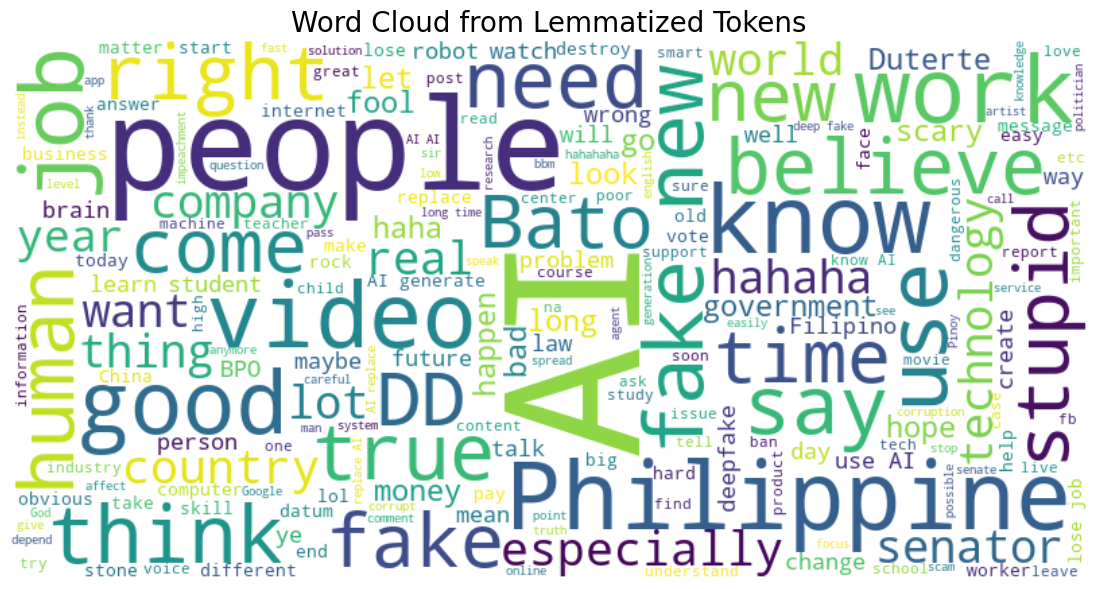

In [356]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(titles_2_text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud from Lemmatized Tokens", fontsize=20)
plt.show()


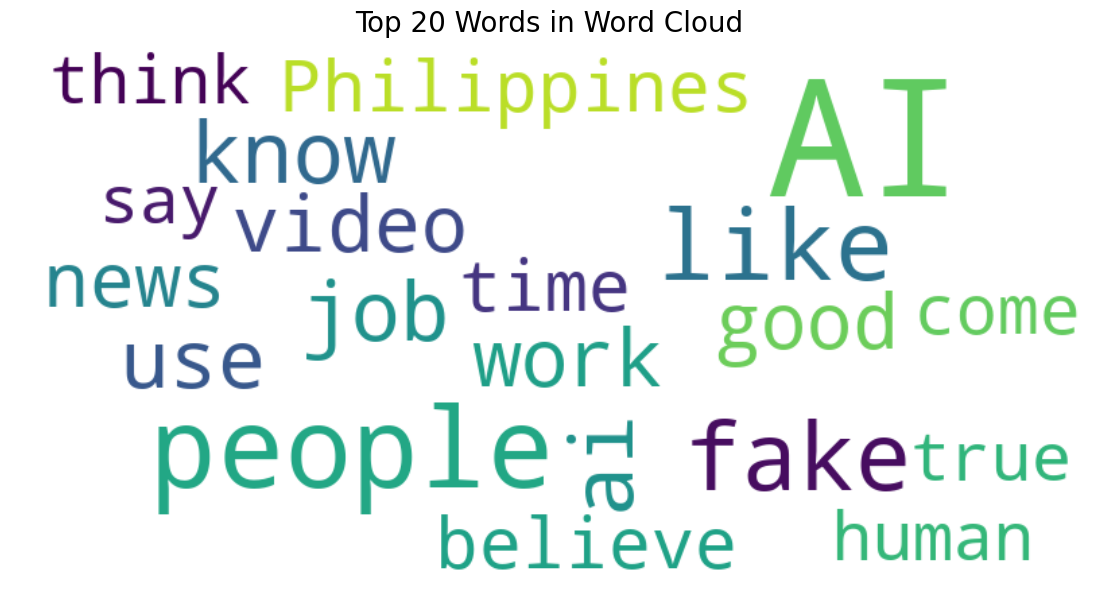

In [357]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Step 1: Count word frequencies
word_freq = Counter(titles_2_tokens)

# Step 2: Get top 20 most common words
top_20 = dict(word_freq.most_common(20))

# Clean the keys to remove any newlines or unwanted spaces
top_20_cleaned = {word.replace('\n', ' ').strip(): freq for word, freq in top_20.items()}

# Step 3: Generate the word cloud using only top 20 words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_20_cleaned)

# Step 4: Plot it
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Top 20 Words in Word Cloud", fontsize=20)
plt.show()


Top 10 words by frequency:
AI: 1376
people: 480
like: 347
fake: 280
really: 272
even: 268
still: 251
job: 243
know: 242
also: 225


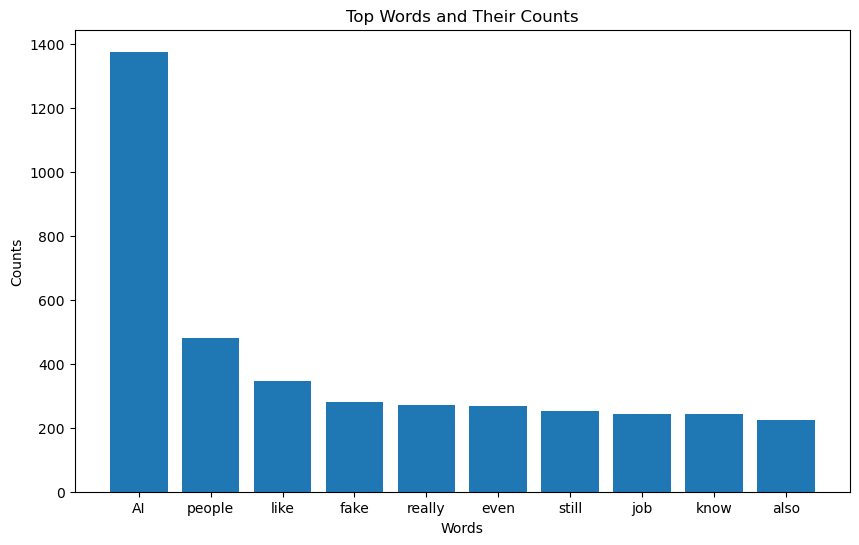

In [358]:
word_counts = nltk.FreqDist(titles_1_tokens)

print("Top 10 words by frequency:")
for word, freq in word_counts.most_common(10):
    print(f"{word}: {freq}")
# Filter only alphabetic words and get their counts
filtered_word_counts = {word: count for word, count in word_counts.items() if word.isalpha()}

# Get top 10 most common alphabetic words
top_words = sorted(filtered_word_counts.items(), key=lambda x: x[1], reverse=True)[:10]
words, counts = zip(*top_words)

plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.title('Top Words and Their Counts')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.show()


In [359]:
titles_2_tokens

['ur',
 'LIL',
 'SODA',
 'POP',
 'UR',
 'think',
 'ur',
 'need',
 'LIL',
 'SODA',
 'POP',
 'LIL',
 'SODA',
 'POP',
 'long',
 'message',
 'correct',
 'AI',
 'ok',
 'MICHAEL',
 'VICTIM',
 'DEEPFAKE',
 'video',
 'endorsement',
 'prg',
 'black',
 'mirror',
 'na',
 'watch',
 'badly',
 'untrained',
 'eye',
 'real',
 'ai',
 'ban',
 'charater',
 'fake',
 'Voice',
 'AI',
 'Use',
 'voice',
 'instead',
 'Mel',
 'tiangco',
 'voice',
 'investment',
 'scam',
 'scatter',
 'internet',
 'police',
 'do',
 'answer',
 'AI',
 'AI',
 'battle',
 'use',
 'AI',
 'detect',
 'manipulation',
 'begin',
 'hopefully',
 'law',
 'abuse',
 'early',
 'strange',
 'fb',
 'report',
 'thing',
 'like',
 'account',
 'block',
 'immediately',
 'ASK',
 'FACEBOOK',
 'permission',
 'CONTROL',
 'FACEBOOK',
 'YOUTUBE',
 'SOCIAL',
 'media',
 'apps',
 'censored',
 'AI',
 'ENFORCEMENT',
 'suspect',
 'use',
 'Artificial',
 'Intelligence',
 'evil',
 'spread',
 'technology',
 'evolve',
 'scary',
 'good',
 'thing',
 'bad',
 'thing',
 'down

In [360]:
text = ' '.join(titles_2_tokens)
text

'ur LIL SODA POP UR think ur need LIL SODA POP LIL SODA POP long message correct AI ok MICHAEL VICTIM DEEPFAKE video endorsement prg black mirror na watch badly untrained eye real ai ban charater fake Voice AI Use voice instead Mel tiangco voice investment scam scatter internet police do answer AI AI battle use AI detect manipulation begin hopefully law abuse early strange fb report thing like account block immediately ASK FACEBOOK permission CONTROL FACEBOOK YOUTUBE SOCIAL media apps censored AI ENFORCEMENT suspect use Artificial Intelligence evil spread technology evolve scary good thing bad thing downside AI hope AI go style platform ban Philippines shopee artist endorser obvious product handle equal report meta reply community policy independent fact checker anymore invent geniuse obob point cyber crime AI AI NBI new technology catch picture Ai turn video ai bad like matrix stupid DDS believe edi ban fb Jan scammer result give freedom break law strict obey law year prison immediate

In [361]:
from nltk import bigrams, trigrams
from collections import Counter

In [362]:
tokens = word_tokenize(text)
tokens = [word for word in tokens
          if word not in stopwords.words('english')
          and word not in string.punctuation]

tokens

['ur',
 'LIL',
 'SODA',
 'POP',
 'UR',
 'think',
 'ur',
 'need',
 'LIL',
 'SODA',
 'POP',
 'LIL',
 'SODA',
 'POP',
 'long',
 'message',
 'correct',
 'AI',
 'ok',
 'MICHAEL',
 'VICTIM',
 'DEEPFAKE',
 'video',
 'endorsement',
 'prg',
 'black',
 'mirror',
 'na',
 'watch',
 'badly',
 'untrained',
 'eye',
 'real',
 'ai',
 'ban',
 'charater',
 'fake',
 'Voice',
 'AI',
 'Use',
 'voice',
 'instead',
 'Mel',
 'tiangco',
 'voice',
 'investment',
 'scam',
 'scatter',
 'internet',
 'police',
 'answer',
 'AI',
 'AI',
 'battle',
 'use',
 'AI',
 'detect',
 'manipulation',
 'begin',
 'hopefully',
 'law',
 'abuse',
 'early',
 'strange',
 'fb',
 'report',
 'thing',
 'like',
 'account',
 'block',
 'immediately',
 'ASK',
 'FACEBOOK',
 'permission',
 'CONTROL',
 'FACEBOOK',
 'YOUTUBE',
 'SOCIAL',
 'media',
 'apps',
 'censored',
 'AI',
 'ENFORCEMENT',
 'suspect',
 'use',
 'Artificial',
 'Intelligence',
 'evil',
 'spread',
 'technology',
 'evolve',
 'scary',
 'good',
 'thing',
 'bad',
 'thing',
 'downside',


In [363]:
df_last.head()

like_count     video_id                                    translated_text  \
0           0  QGlitcqjKyM  UR MY LIL SODA POP UR ALL I CAN THINK OF UR AL...   
1           0  QGlitcqjKyM  Dd5s will say "as long as the message is corre...   
2           0  QGlitcqjKyM    MICHAEL V. VICTIM OF DEEPFAKE VIDEO ENDORSEMENT   
3           0  QGlitcqjKyM                                Prg black mirror na   
4           0  QGlitcqjKyM  I watched it so badly with untrained eyes that...   

                                   lemmatized_tokens  \
0  (UR, LIL, SODA, POP, UR, THINK, UR, NEED, LIL,...   
1  (Dd5s, say, ``, long, message, correct, '', AI...   
2  (MICHAEL, V., VICTIM, DEEPFAKE, VIDEO, ENDORSE...   
3                           (Prg, black, mirror, na)   
4     (watched, badly, untrained, eye, seemed, real)   

                             spacy_lemmatized_tokens             published  \
0  (ur, LIL, SODA, POP, UR, think, ur, need, LIL,...  2025-09-07T14:08:44Z   
1       (Dd5s, long, message, correct, AI, ​​is, ok)  2025-08-27T16:09:04Z   
2  (MICHAEL, V., VICTIM, DEEPFAKE, video, endorse...  2025-07-15T19:00:41Z   
3                           (prg, black, mirror, na)  2025-06-18T04:33:24Z   
4               (watch, badly, untrained, eye, real)  2025-06-14T02:16:50Z   

   len_tokens  len_spacy_tokens  
0         108               116  
1          87                68  
2          63                63  
3          32                32  
4          58                46

In [364]:
import re
import nltk
from nltk.corpus import stopwords
import string
from nltk.util import ngrams
from nltk import FreqDist

stop_words = set(stopwords.words('english'))

def preprocess_text(tokens):
    # Lowercase and remove punctuation/stopwords, keep only alphabetic words
    cleaned = [
        word.lower() for word in tokens
        if word.lower() not in stop_words
        and word not in string.punctuation
        and not re.match(r"^[\'\"“”‘’]+$", word)  # quotes/apostrophes
        and word.isalpha()  # keep only alphabetic words
    ]
    return cleaned

# Apply preprocessing on tokens column (assuming df_analysis['tokens'] exists)
df_last['cleaned_tokens'] = df_last['spacy_lemmatized_tokens'].apply(preprocess_text)

# Generate bigrams from cleaned tokens
df_last['bigrams'] = df_last['cleaned_tokens'].apply(lambda tokens: list(ngrams(tokens, 2)))

# Flatten bigrams into a single list
bigrams = df_last['bigrams'].explode().tolist()

# Count frequencies of bigrams
bigram_counts = FreqDist(bigrams)

# Print top 10 most common bigrams
print("Top 10 bigrams by frequency:")
for (w1, w2), freq in bigram_counts.most_common(10):
    print(f"{w1} {w2}: {freq}")


Top 10 bigrams by frequency:
fake news: 160
use ai: 73
ai generate: 57
lose job: 45
know ai: 38
long time: 34
ai replace: 32
replace ai: 31
deep fake: 30
ai video: 30


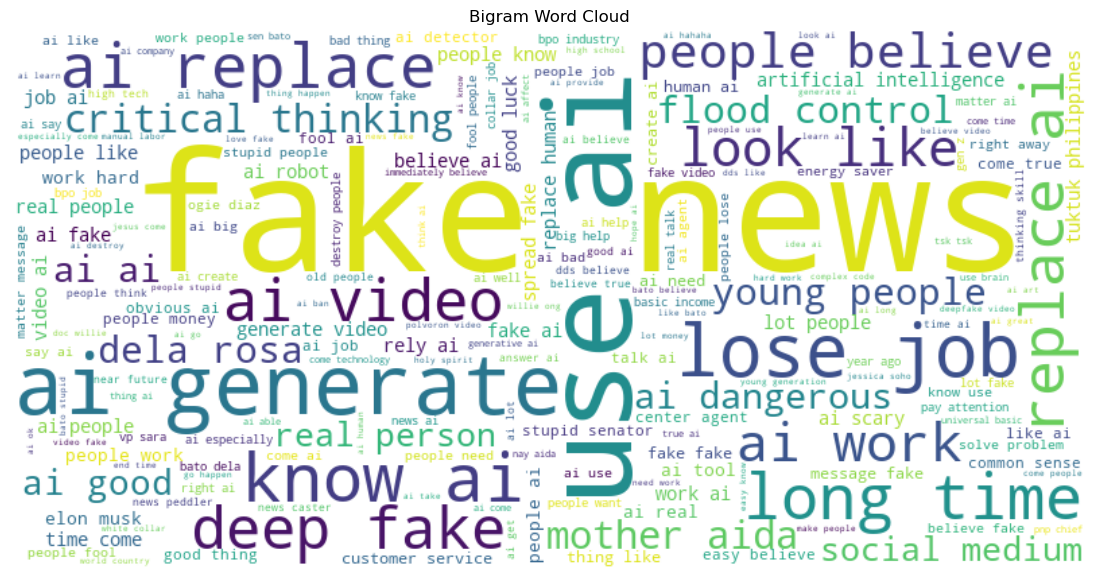

In [365]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Safe conversion of bigram tuples to strings for wordcloud input
bigram_freq_dict = {
    ' '.join(bigram) if isinstance(bigram, (list, tuple)) else str(bigram): freq
    for bigram, freq in bigram_counts.items()
}

# Create the word cloud from frequency dictionary
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(bigram_freq_dict)

# Plotting the word cloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.title("Bigram Word Cloud")
plt.show()


In [366]:
import re
import nltk
from nltk.corpus import stopwords
import string
from nltk.util import ngrams
from nltk import FreqDist

stop_words = set(stopwords.words('english'))

def preprocess_text(tokens):
    # Lowercase and remove punctuation/stopwords, keep only alphabetic words
    cleaned = [
        word.lower() for word in tokens
        if word.lower() not in stop_words
        and word not in string.punctuation
        and not re.match(r"^[\'\"“”‘’]+$", word)  # quotes/apostrophes
        and word.isalpha()  # keep only alphabetic words
    ]
    return cleaned

# Apply preprocessing on tokens column (assuming df_analysis['tokens'] exists)
df_last['cleaned_tokens'] = df_last['spacy_lemmatized_tokens'].apply(preprocess_text)

# Generate trigrams from cleaned tokens
df_last['trigrams'] = df_last['cleaned_tokens'].apply(lambda tokens: list(ngrams(tokens, 3)))

# # Flatten trigrams into a single list
trigrams = df_last['trigrams'].explode().tolist()

# Count frequencies of trigrams
trigram_counts = FreqDist(trigrams)

# Print top 10 most common trigrams
print("Top 10 trigrams by frequency:")
for (w1, w2, w3), freq in trigram_counts.most_common(10):
    print(f"{w1} {w2} {w3}: {freq}")


Top 10 trigrams by frequency:
ai generate video: 14
spread fake news: 11
people lose job: 9
fake news peddler: 7
believe fake news: 7
fake news ai: 7
universal basic income: 7
bato dela rosa: 7
critical thinking skill: 6
doc willie ong: 5


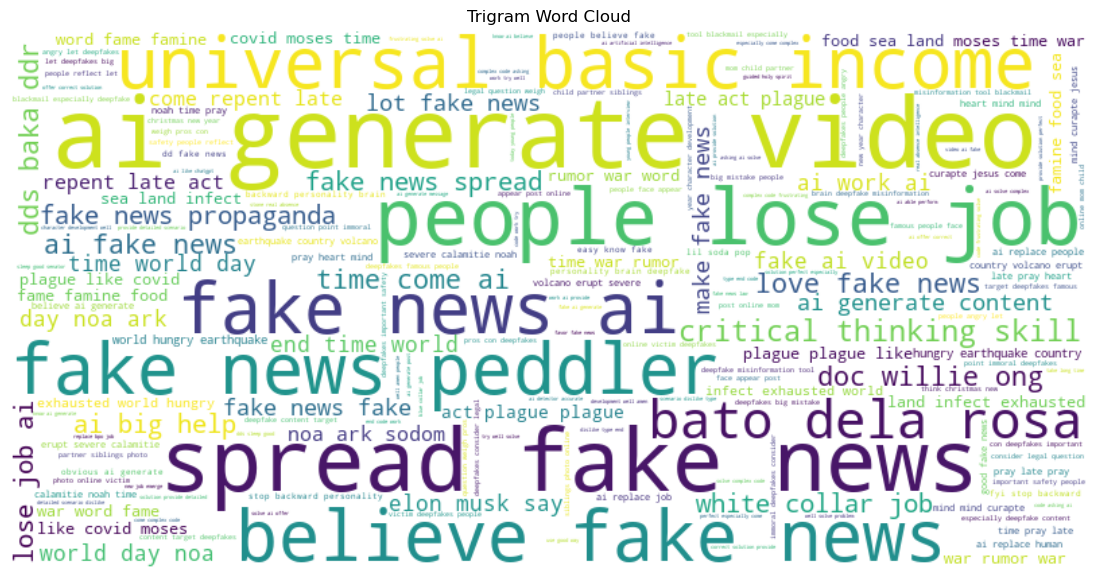

In [367]:
from nltk.util import ngrams
from nltk import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have a 'cleaned_tokens' column in your df_analysis dataframe

# Generate trigrams from cleaned tokens
df_last['trigrams'] = df_last['cleaned_tokens'].apply(lambda tokens: list(ngrams(tokens, 3)))

# Flatten trigrams into a single list
trigrams = df_last['trigrams'].explode().tolist()

# Count frequencies of trigrams
trigram_counts = FreqDist(trigrams)

# Safe conversion of trigram tuples to strings for wordcloud input
trigram_freq_dict = {
    ' '.join(trigram) if isinstance(trigram, (list, tuple)) else str(trigram): freq
    for trigram, freq in trigram_counts.items()
}

# Create the word cloud from frequency dictionary
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(trigram_freq_dict)

# Plotting the word cloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.title("Trigram Word Cloud")
plt.show()


In [244]:
df_last.head()

like_count     video_id                                    translated_text  \
0           0  QGlitcqjKyM  UR MY LIL SODA POP UR ALL I CAN THINK OF UR AL...   
1           0  QGlitcqjKyM  Dd5s will say "as long as the message is corre...   
2           0  QGlitcqjKyM    MICHAEL V. VICTIM OF DEEPFAKE VIDEO ENDORSEMENT   
3           0  QGlitcqjKyM                                Prg black mirror na   
4           0  QGlitcqjKyM  I watched it so badly with untrained eyes that...   

                                   lemmatized_tokens  \
0  (UR, LIL, SODA, POP, UR, THINK, UR, NEED, LIL,...   
1  (Dd5s, say, ``, long, message, correct, '', AI...   
2  (MICHAEL, V., VICTIM, DEEPFAKE, VIDEO, ENDORSE...   
3                           (Prg, black, mirror, na)   
4     (watched, badly, untrained, eye, seemed, real)   

                             spacy_lemmatized_tokens             published  \
0  (ur, LIL, SODA, POP, UR, think, ur, need, LIL,...  2025-09-07T14:08:44Z   
1       (Dd5s, long, message, correct, AI, ​​is, ok)  2025-08-27T16:09:04Z   
2  (MICHAEL, V., VICTIM, DEEPFAKE, video, endorse...  2025-07-15T19:00:41Z   
3                           (prg, black, mirror, na)  2025-06-18T04:33:24Z   
4               (watch, badly, untrained, eye, real)  2025-06-14T02:16:50Z   

   len_tokens  len_spacy_tokens  \
0          15                17   
1          10                 7   
2           6                 6   
3           4                 4   
4           6                 5   

                                      cleaned_tokens  \
0  [ur, lil, soda, pop, ur, think, ur, need, lil,...   
1                   [long, message, correct, ai, ok]   
2    [michael, victim, deepfake, video, endorsement]   
3                           [prg, black, mirror, na]   
4               [watch, badly, untrained, eye, real]   

                                             bigrams  \
0  [(ur, lil), (lil, soda), (soda, pop), (pop, ur...   
1  [(long, message), (message, correct), (correct...   
2  [(michael, victim), (victim, deepfake), (deepf...   
3      [(prg, black), (black, mirror), (mirror, na)]   
4  [(watch, badly), (badly, untrained), (untraine...   

                                            trigrams  
0  [(ur, lil, soda), (lil, soda, pop), (soda, pop...  
1  [(long, message, correct), (message, correct, ...  
2  [(michael, victim, deepfake), (victim, deepfak...  
3        [(prg, black, mirror), (black, mirror, na)]  
4  [(watch, badly, untrained), (badly, untrained,...

In [245]:
df_last.sort_values(by='like_count', ascending=False).head(100)


like_count     video_id  \
2484         573  l34hAuvJkYk   
2464         304  l34hAuvJkYk   
1205         203  bEbPosDpz2k   
2664         185  l34hAuvJkYk   
2822         142  l34hAuvJkYk   
...          ...          ...   
2819          17  l34hAuvJkYk   
1387          17  cLj48tIr_Ko   
2530          16  l34hAuvJkYk   
4072          16  x4SvP-Ne-uY   
2482          16  l34hAuvJkYk   

                                        translated_text  \
2484  I'm also an editor, but I've never done anythi...   
2464  That's why I teach my students Right and wrong...   
1205  Only positions in the government should be AI ...   
2664  This is so scary. \nPeople can able to destroy...   
2822  It's not true, but it's entertaining to watch....   
...                                                 ...   
2819  SO BE CAREFUL WHEN SHARING YOUR FACE ON SOCIAL...   
1387  Engr. Diosdado Banatao is one of our modern da...   
2530  That depends on whether they are left behind b...   
4072  He is the founder of Data Ethics Ph. He is ind...   
2482                                             Yessir   

                                      lemmatized_tokens  \
2484  ('m, also, editor, 've, never, done, anything,...   
2464     ('s, teach, student, Right, wrong, caused, AI)   
1205  (position, government, AI, end, corruption, st...   
2664  (scary, People, able, destroy, someone, using,...   
2822  ('s, true, 's, entertaining, watch, 😄But, 's, ...   
...                                                 ...   
2819  (CAREFUL, SHARING, FACE, SOCIAL, MEDIA, PERSON...   
1387  (Engr, Diosdado, Banatao, one, modern, day, ro...   
2530  (depends, whether, left, behind, technology, t...   
4072            (founder, Data, Ethics, Ph, indeed, OG)   
2482                                          (Yessir,)   

                                spacy_lemmatized_tokens             published  \
2484  (editor, AI, lot, people, believe, 3d, real, o...  2025-06-23T13:07:18Z   
2464          (teach, student, right, wrong, cause, AI)  2025-06-23T12:45:17Z   
1205  (position, government, AI, end, corruption, st...  2025-01-14T13:39:14Z   
2664  (scary, \n , People, able, destroy, AI, \n , 😢...  2025-06-23T14:35:21Z   
2822  (true, entertaining, watch, 😄, important, teac...  2025-06-23T20:21:14Z   
...                                                 ...                   ...   
2819  (careful, sharing, face, SOCIAL, media, person...  2025-06-23T20:12:09Z   
1387  (Engr, Diosdado, Banatao, modern, day,   , rol...  2020-03-05T03:28:17Z   
2530  (depends, leave, technology, technology, new, ...  2025-06-23T13:28:57Z   
4072                    (founder, Data, Ethics, Ph, og)  2024-12-30T03:52:11Z   
2482                                          (Yessir,)  2025-06-23T13:04:02Z   

      len_tokens  len_spacy_tokens  \
2484          20                11   
2464           7                 6   
1205          15                14   
2664          10                 9   
2822          17                12   
...          ...               ...   
2819          10                 8   
1387          42                41   
2530           8                 6   
4072           6                 5   
2482           1                 1   

                                         cleaned_tokens  \
2484  [editor, ai, lot, people, believe, real, opini...   
2464          [teach, student, right, wrong, cause, ai]   
1205  [position, government, ai, end, corruption, st...   
2664                 [scary, people, able, destroy, ai]   
2822  [true, entertaining, watch, important, teach, ...   
...                                                 ...   
2819  [careful, sharing, face, social, media, person...   
1387  [engr, diosdado, banatao, modern, day, role, m...   
2530  [depends, leave, technology, technology, new, ...   
4072                    [founder, data, ethics, ph, og]   
2482                                           [yessir]   

                                                bigr

In [371]:
df_last.to_csv('yt_comments_for_sentiments.csv',index = False)

In [246]:
df_analysis[df_analysis['translated_text'].str.contains('dds')]


like_count      video_id  \
33             0   QGlitcqjKyM   
43             0   QGlitcqjKyM   
84             6   QGlitcqjKyM   
87             1   QGlitcqjKyM   
175            0   uLjDMgyLDbM   
177            0   uLjDMgyLDbM   
182            0   uLjDMgyLDbM   
193            1   uLjDMgyLDbM   
217            0   uLjDMgyLDbM   
340            0   uLjDMgyLDbM   
341            0   uLjDMgyLDbM   
363            0  cLj48tIar_Ko   
372            0  cLj48tIar_Ko   
420           10   uLjDMgyLDbM   
424            0  cLj48tIar_Ko   
430            0  cLj48tIar_Ko   
439            6  cLj48tIar_Ko   
440            0  cLj48tIar_Ko   
1325           1   DjZwAii8tes   
1361           5   DjZwAii8tes   
1422           0   3IyL-MK5XfQ   
1477           0   3IyL-MK5XfQ   
1572           0   3IyL-MK5XfQ   
1664           0   3IyL-MK5XfQ   
1673           0   3IyL-MK5XfQ   
1696           0   3IyL-MK5XfQ   
1746           0   3IyL-MK5XfQ   
1771           0   3IyL-MK5XfQ   
1775           0   3IyL-MK5XfQ   
1790           0   3IyL-MK5XfQ   
1791           0   3IyL-MK5XfQ   
1804           0   3IyL-MK5XfQ   
1828           1   3IyL-MK5XfQ   
1851           0   3IyL-MK5XfQ   
1862           0   3IyL-MK5XfQ   
1905           0   3IyL-MK5XfQ   
1910           0   3IyL-MK5XfQ   
1915           0   3IyL-MK5XfQ   
1946           2   3IyL-MK5XfQ   
1973           0   3IyL-MK5XfQ   
1996           0   3IyL-MK5XfQ   
2038           0   3IyL-MK5XfQ   
2130           0   3IyL-MK5XfQ   
2502           0   l34hAuvJkYk   
2582           0   l34hAuvJkYk   
2636           0   l34hAuvJkYk   
2705           6   l34hAuvJkYk   
2859           0   l34hAuvJkYk   
2973           0   l34hAuvJkYk   
3059           0   l34hAuvJkYk   
3117           0   l34hAuvJkYk   
3118           0   l34hAuvJkYk   
3164           1   l34hAuvJkYk   
3272           0   l34hAuvJkYk   
3288           1   l34hAuvJkYk   
3311           0   l34hAuvJkYk   
3432           0   l34hAuvJkYk   
3439           0   l34hAuvJkYk   

                                        translated_text  \
33    The dds like that is obvious then the fake acc...   
43    Only dds can easily fall for such things. Look...   
84    All ads should go through a fact checker befor...   
87                    Stupid dds are going to be stupid   
175               The dds trolls are fond of deepfakes.   
177                ddshits like to spread deepfakes lol   
182   That's why the video of the dds was messed up....   
193       Those ddshits who love sq fake news wahahahah   
217                     Duterte's ddshits are fake news   
340   Only dds will be fooled by fake news🤣 but ther...   
341   DDS what's up? WAVE YOU THERE! HAHAHAHHA 👊🏼👊🏼👊...   
363                 dds, they worship vp and quiboloy..   
372   @@MugCofee we love china we are slave country ...   
420   That's how dds😂 loves fake!😅😅 bbm even made a ...   
424              ​@@emman-arcade-2004 you dds spotted 🙄   
430   ​@@TonyCarias-er7 there is a lot of "evidence"...   
439                                     especially dds!   
440   only dds believe that. how do you educate peop...   
1325  Investigate ddshit trolls like digong, roque, ...   
1361               What the dds do is really sickening.   
1422  Kalbo said that the boy is still good, he unde...   
1477                                       dds gunggung   
1572  What do you expect from ddshits, those are stu...   
1664  ​@@alexanderdemetriousoh tpos???hahaha..feelin...   
1673                         basta ddshit troollsmaster   
1696                      But the dds will eat that too   
1746                        The dds are really stupid 😂   
1771  2:57 that's all they can do to destroy...it's ...   
1775   Hey miracle there is no dds💩 here in comsec. 😂😂😂   
1790  As long as dds is required to be stupid and si...   
1791  the saying my grandfather said is really true....   
1804                                       Solid dds.😂😂   
1828  oh gosh that's not new to dds! only the weak a

In [318]:
# df_last.head()

like_count     video_id                                    translated_text  \
0           0  QGlitcqjKyM  UR MY LIL SODA POP UR ALL I CAN THINK OF UR AL...   
1           0  QGlitcqjKyM  Dd5s will say "as long as the message is corre...   
2           0  QGlitcqjKyM    MICHAEL V. VICTIM OF DEEPFAKE VIDEO ENDORSEMENT   
3           0  QGlitcqjKyM                                Prg black mirror na   
4           0  QGlitcqjKyM  I watched it so badly with untrained eyes that...   

                                   lemmatized_tokens  \
0  [UR, LIL, SODA, POP, UR, THINK, UR, NEED, LIL,...   
1  [Dd5s, say, ``, long, message, correct, '', AI...   
2  [MICHAEL, V., VICTIM, DEEPFAKE, VIDEO, ENDORSE...   
3                           [Prg, black, mirror, na]   
4     [watched, badly, untrained, eye, seemed, real]   

                             spacy_lemmatized_tokens             published  \
0  [ur, LIL, SODA, POP, UR, think, ur, need, LIL,...  2025-09-07T14:08:44Z   
1       [Dd5s, long, message, correct, AI, ​​is, ok]  2025-08-27T16:09:04Z   
2  [MICHAEL, V., VICTIM, DEEPFAKE, video, endorse...  2025-07-15T19:00:41Z   
3                           [prg, black, mirror, na]  2025-06-18T04:33:24Z   
4               [watch, badly, untrained, eye, real]  2025-06-14T02:16:50Z   

   len_tokens  len_spacy_tokens  
0          15                17  
1          10                 7  
2           6                 6  
3           4                 4  
4           6                 5

In [328]:
# # Count duplicates in the 'translated_text' column
# dup_counts = df_analysis['translated_text'].value_counts()

# # Filter texts that appear more than twice
# repeated_texts = dup_counts[dup_counts > 2].index

# # Show all rows where translated_text appears more than twice
# spam_comments = df_analysis[df_analysis['translated_text'].isin(repeated_texts)]

# # Display
# spam_comments


like_count      video_id   translated_text        lemmatized_tokens  \
148            0   uLjDMgyLDbM                 😂                    ['😂']   
176            0  cLj48tIar_Ko  DDS?\ncause DDR.  ['DDS', 'cause', 'DDR']   
178            0  cLj48tIar_Ko  DDS?\ncause DDR.  ['DDS', 'cause', 'DDR']   
180            0  cLj48tIar_Ko  DDS?\ncause DDR.  ['DDS', 'cause', 'DDR']   
194            0  cLj48tIar_Ko  DDS?\ncause DDR.  ['DDS', 'cause', 'DDR']   
...          ...           ...               ...                      ...   
3688           0   l34hAuvJkYk                :)                       []   
3705           0   l34hAuvJkYk              haha                 ['haha']   
3756           0   l34hAuvJkYk              😂😂😂😂                 ['😂😂😂😂']   
3916           0   t5nZAwWXLFk              TRUE                 ['TRUE']   
4258           0   x4SvP-Ne-uY              TRUE                 ['TRUE']   

             spacy_lemmatized_tokens             published  
148                            ['😂']  2024-12-18T09:49:50Z  
176   ['DDS', '\n ', 'cause', 'DDR']  2024-12-20T08:47:43Z  
178   ['DDS', '\n ', 'cause', 'DDR']  2024-12-21T05:23:59Z  
180   ['DDS', '\n ', 'cause', 'DDR']  2024-12-20T08:56:24Z  
194   ['DDS', '\n ', 'cause', 'DDR']  2024-12-20T08:56:53Z  
...                              ...                   ...  
3688                              []  2025-06-29T16:52:17Z  
3705                        ['haha']  2025-06-30T10:15:28Z  
3756            ['😂', '😂', '😂', '😂']  2025-07-06T01:46:23Z  
3916                        ['true']  2024-01-29T14:19:09Z  
4258                        ['true']  2025-06-01T11:23:57Z  

[66 rows x 6 columns]

In [336]:
# spam_comments.index

Index([ 148,  176,  178,  180,  194,  207,  218,  221,  225,  244,  246,  249,
        279,  309,  318,  332,  342,  355,  385,  392,  396,  398,  423,  433,
        544,  595,  704, 1324, 1329, 1338, 1342, 1351, 1453, 1679, 1680, 1681,
       1801, 1986, 2002, 2003, 2007, 2022, 2372, 2459, 2518, 2564, 2633, 2712,
       2755, 2779, 2835, 3043, 3315, 3316, 3317, 3412, 3498, 3684, 3685, 3686,
       3687, 3688, 3705, 3756, 3916, 4258],
      dtype='int64')

In [339]:
# # Use the index of the spam comments to drop them from df_last
# df_last= df_analysis.drop(index=spam_comments.index, errors='ignore')
# df_last.shape

(4197, 6)

In [342]:
# df_last

like_count     video_id  \
0              0  QGlitcqjKyM   
1              0  QGlitcqjKyM   
2              0  QGlitcqjKyM   
3              0  QGlitcqjKyM   
4              0  QGlitcqjKyM   
...          ...          ...   
4257           0  x4SvP-Ne-uY   
4259           0  x4SvP-Ne-uY   
4260           1  x4SvP-Ne-uY   
4261           0  x4SvP-Ne-uY   
4262           0  x4SvP-Ne-uY   

                                        translated_text  \
0     UR MY LIL SODA POP UR ALL I CAN THINK OF UR AL...   
1     Dd5s will say "as long as the message is corre...   
2       MICHAEL V. VICTIM OF DEEPFAKE VIDEO ENDORSEMENT   
3                                   Prg black mirror na   
4     I watched it so badly with untrained eyes that...   
...                                                 ...   
4257                                          haha! oyy   
4259                @@khoroshoigra8388 true, also a dev   
4260                                   true, also a dev   
4261  @@denniszenanywhere true. there's a company th...   
4262                         Jollibee is always Hiring.   

                                      lemmatized_tokens  \
0     ['UR', 'LIL', 'SODA', 'POP', 'UR', 'THINK', 'U...   
1     ['Dd5s', 'say', '``', 'long', 'message', 'corr...   
2     ['MICHAEL', 'V.', 'VICTIM', 'DEEPFAKE', 'VIDEO...   
3                      ['Prg', 'black', 'mirror', 'na']   
4     ['watched', 'badly', 'untrained', 'eye', 'seem...   
...                                                 ...   
4257                                    ['haha', 'oyy']   
4259        ['khoroshoigra8388', 'true', 'also', 'dev']   
4260                            ['true', 'also', 'dev']   
4261  ['denniszenanywhere', 'true', "'s", 'company',...   
4262                   ['Jollibee', 'always', 'Hiring']   

                                spacy_lemmatized_tokens             published  
0     ['ur', 'LIL', 'SODA', 'POP', 'UR', 'think', 'u...  2025-09-07T14:08:44Z  
1     ['Dd5s', 'long', 'message', 'correct', 'AI', '...  2025-08-27T16:09:04Z  
2     ['MICHAEL', 'V.', 'VICTIM', 'DEEPFAKE', 'video...  2025-07-15T19:00:41Z  
3                      ['prg', 'black', 'mirror', 'na']  2025-06-18T04:33:24Z  
4        ['watch', 'badly', 'untrained', 'eye', 'real']  2025-06-14T02:16:50Z  
...                                                 ...                   ...  
4257                                    ['haha', 'oyy']  2025-06-01T11:23:29Z  
4259              ['@@khoroshoigra8388', 'true', 'dev']  2025-06-01T11:25:35Z  
4260                                    ['true', 'dev']  2025-06-01T11:25:41Z  
4261  ['@@denniszenanywhere', 'true', 'company', 'le...  2025-06-01T11:27:58Z  
4262                             ['Jollibee', 'hiring']  2025-07-24T11:58:00Z  

[4197 rows x 6 columns]

In [340]:
# df_analysis.shape

(4263, 6)

In [ ]:
# df_final.head()

In [ ]:
# df_last.to_csv('yt_comments_for_modelling.csv',index = False)

In [122]:
import pandas as pd

In [181]:
df = pd.read_csv('yt_comments_for_analysis.csv')

In [182]:
df.head()

like_count     video_id                                    translated_text  \
0           0  QGlitcqjKyM  UR MY LIL SODA POP UR ALL I CAN THINK OF UR AL...   
1           0  QGlitcqjKyM  Dd5s will say "as long as the message is corre...   
2           0  QGlitcqjKyM    MICHAEL V. VICTIM OF DEEPFAKE VIDEO ENDORSEMENT   
3           0  QGlitcqjKyM                                Prg black mirror na   
4           0  QGlitcqjKyM  I watched it so badly with untrained eyes that...   

                                   lemmatized_tokens  \
0  ('UR', 'LIL', 'SODA', 'POP', 'UR', 'THINK', 'U...   
1  ('Dd5s', 'say', '``', 'long', 'message', 'corr...   
2  ('MICHAEL', 'V.', 'VICTIM', 'DEEPFAKE', 'VIDEO...   
3                   ('Prg', 'black', 'mirror', 'na')   
4  ('watched', 'badly', 'untrained', 'eye', 'seem...   

                             spacy_lemmatized_tokens             published  \
0  ('ur', 'LIL', 'SODA', 'POP', 'UR', 'think', 'u...  2025-09-07T14:08:44Z   
1  ('Dd5s', 'long', 'message', 'correct', 'AI', '...  2025-08-27T16:09:04Z   
2  ('MICHAEL', 'V.', 'VICTIM', 'DEEPFAKE', 'video...  2025-07-15T19:00:41Z   
3                   ('prg', 'black', 'mirror', 'na')  2025-06-18T04:33:24Z   
4     ('watch', 'badly', 'untrained', 'eye', 'real')  2025-06-14T02:16:50Z   

   len_tokens  len_spacy_tokens  \
0         108               116   
1          87                68   
2          63                63   
3          32                32   
4          58                46   

                                      cleaned_tokens  \
0  ['ur', 'lil', 'soda', 'pop', 'ur', 'think', 'u...   
1         ['long', 'message', 'correct', 'ai', 'ok']   
2  ['michael', 'victim', 'deepfake', 'video', 'en...   
3                   ['prg', 'black', 'mirror', 'na']   
4     ['watch', 'badly', 'untrained', 'eye', 'real']   

                                             bigrams  \
0  [('ur', 'lil'), ('lil', 'soda'), ('soda', 'pop...   
1  [('long', 'message'), ('message', 'correct'), ...   
2  [('michael', 'victim'), ('victim', 'deepfake')...   
3  [('prg', 'black'), ('black', 'mirror'), ('mirr...   
4  [('watch', 'badly'), ('badly', 'untrained'), (...   

                                            trigrams  
0  [('ur', 'lil', 'soda'), ('lil', 'soda', 'pop')...  
1  [('long', 'message', 'correct'), ('message', '...  
2  [('michael', 'victim', 'deepfake'), ('victim',...  
3  [('prg', 'black', 'mirror'), ('black', 'mirror...  
4  [('watch', 'badly', 'untrained'), ('badly', 'u...

In [183]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4197 entries, 0 to 4196
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   like_count               4197 non-null   int64 
 1   video_id                 4197 non-null   object
 2   translated_text          4197 non-null   object
 3   lemmatized_tokens        4197 non-null   object
 4   spacy_lemmatized_tokens  4197 non-null   object
 5   published                4197 non-null   object
 6   len_tokens               4197 non-null   int64 
 7   len_spacy_tokens         4197 non-null   int64 
 8   cleaned_tokens           4197 non-null   object
 9   bigrams                  4197 non-null   object
 10  trigrams                 4197 non-null   object
dtypes: int64(3), object(8)
memory usage: 360.8+ KB


In [185]:
df['like_count'].astype(int)
df_likes = df.sort_values(by='like_count', ascending = False)
df_likes[df['like_count'] >= 1]

C:\Users\Andreen Gonzaga\AppData\Local\Temp\ipykernel_45504\1193180227.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_likes[df['like_count'] >= 1]


like_count     video_id  \
2440         573  l34hAuvJkYk   
2420         304  l34hAuvJkYk   
1178         203  bEbPosDpz2k   
2617         185  l34hAuvJkYk   
2772         142  l34hAuvJkYk   
...          ...          ...   
510            1  uNI_25lNdjI   
841            1  ODv0IuMnmiE   
508            1  uNI_25lNdjI   
516            1  uNI_25lNdjI   
4128           1  x4SvP-Ne-uY   

                                        translated_text  \
2440  I'm also an editor, but I've never done anythi...   
2420  That's why I teach my students Right and wrong...   
1178  Only positions in the government should be AI ...   
2617  This is so scary. \nPeople can able to destroy...   
2772  It's not true, but it's entertaining to watch....   
...                                                 ...   
510                          1:50 That got me laughing!   
841   ​​@fredtayam3638Work smart not hard you are sa...   
508   ok the creator of this fake video came from, b...   
516                                     Hahaha AI naman   
4128                                      So fewer jobs   

                                      lemmatized_tokens  \
2440  ("'m", 'also', 'editor', "'ve", 'never', 'done...   
2420  ("'s", 'teach', 'student', 'Right', 'wrong', '...   
1178  ('position', 'government', 'AI', 'end', 'corru...   
2617  ('scary', 'People', 'able', 'destroy', 'someon...   
2772  ("'s", 'true', "'s", 'entertaining', 'watch', ...   
...                                                 ...   
510                         ('1:50', 'got', 'laughing')   
841   ('\u200b\u200b', 'fredtayam3638Work', 'smart',...   
508   ('ok', 'creator', 'fake', 'video', 'came', 'st...   
516                           ('Hahaha', 'AI', 'naman')   
4128                                   ('fewer', 'job')   

                                spacy_lemmatized_tokens             published  \
2440  ('editor', 'AI', 'lot', 'people', 'believe', '...  2025-06-23T13:07:18Z   
2420  ('teach', 'student', 'right', 'wrong', 'cause'...  2025-06-23T12:45:17Z   
1178  ('position', 'government', 'AI', 'end', 'corru...  2025-01-14T13:39:14Z   
2617  ('scary', '\n ', 'People', 'able', 'destroy', ...  2025-06-23T14:35:21Z   
2772  ('true', 'entertaining', 'watch', '😄', 'import...  2025-06-23T20:21:14Z   
...                                                 ...                   ...   
510                            ('1:50', 'get', 'laugh')  2024-12-12T14:15:29Z   
841   ('\u200b\u200b@fredtayam3638work', 'smart', 'h...  2024-12-28T04:52:23Z   
508   ('ok', 'creator', 'fake', 'video', 'come', 'fl...  2024-12-12T14:37:07Z   
516                           ('Hahaha', 'AI', 'naman')  2024-12-12T07:32:17Z   
4128                                     ('few', 'job')  2025-01-06T18:39:37Z   

      len_tokens  len_spacy_tokens  \
2440         171                93   
2420          60                53   
1178         147               136   
2617          82                68   
2772         145               108   
...          ...               ...   
510           27                24   
841           89                83   
508          415               358   
516           25                25   
4128          16                14   

                                         cleaned_tokens  \
2440  ['editor', 'ai', 'lot', 'people', 'believe', '...   
2420  ['teach', 'student', 'right', 'wrong', 'cause'...   
1178  ['position', 'government', 'ai', 'end', 'corru...   
2617       ['scary', 'people', 'able', 'destroy', 'ai']   
2772  ['true', 'entertaining', 'watch', 'important',...   
...                                                 ...   
510                                    ['get', 'laugh']   
841   ['smart', 'hard', 'say', 'wrong', 'thing', 'lol']   
508   ['ok', 'creator', 'fake', 'video', 'come', 'fl...   
516                           ['hahaha', 'ai', 'naman']   
4128                                            ['job']   

                                                bigr

In [186]:
import re
import nltk
from nltk.corpus import stopwords
import string
from nltk.util import ngrams
from nltk import FreqDist
stop_words = set(stopwords.words('english'))

def preprocess_text(tokens):
    # Lowercase and remove punctuation/stopwords, keep only alphabetic words
    cleaned = [
        word.lower() for word in tokens
        if word.lower() not in stop_words
        and word not in string.punctuation
        and not re.match(r"^[\'\"“”‘’]+$", word)  # quotes/apostrophes
        and word.isalpha()  # keep only alphabetic words
    ]
    return cleaned

# Flatten bigrams into a single list
bigrams = df_likes['bigrams'].explode().tolist()

# Count frequencies of bigrams
bigram_counts = FreqDist(bigrams)

# Print top 10 most common bigrams
print("Top 10 bigrams by count:")
# for (w1, w2), freq in bigram_counts.most_common(10):
#     print(f"{w1} {w2}: {freq}")

Top 10 bigrams by count:


[573, 304, 203, 185, 142, 105, 97, 92, 89, 85, 85, 84, 83, 82, 74, 72, 67, 66, 66, 66, 65, 63, 63, 62, 52, 51] ["[('editor', 'ai'), ('ai', 'lot'), ('lot', 'people'), ('people', 'believe'), ('believe', 'real'), ('real', 'opinion'), ('opinion', 'hnd'), ('hnd', 'good'), ('good', 'cause')]", "[('teach', 'student'), ('student', 'right'), ('right', 'wrong'), ('wrong', 'cause'), ('cause', 'ai')]", "[('position', 'government'), ('government', 'ai'), ('ai', 'end'), ('end', 'corruption'), ('corruption', 'steal'), ('steal', 'fund'), ('fund', 'build'), ('build', 'mansion'), ('mansion', 'ai'), ('ai', 'need'), ('need', 'money'), ('money', 'money'), ('money', 'laundering')]", "[('scary', 'people'), ('people', 'able'), ('able', 'destroy'), ('destroy', 'ai')]", "[('true', 'entertaining'), ('entertaining', 'watch'), ('watch', 'important'), ('important', 'teach'), ('teach', 'family'), ('family', 'friend'), ('friend', 'one'), ('one', 'ai'), ('ai', 'one'), ('one', 'real')]", "[('bato', 'investigate'), ('in

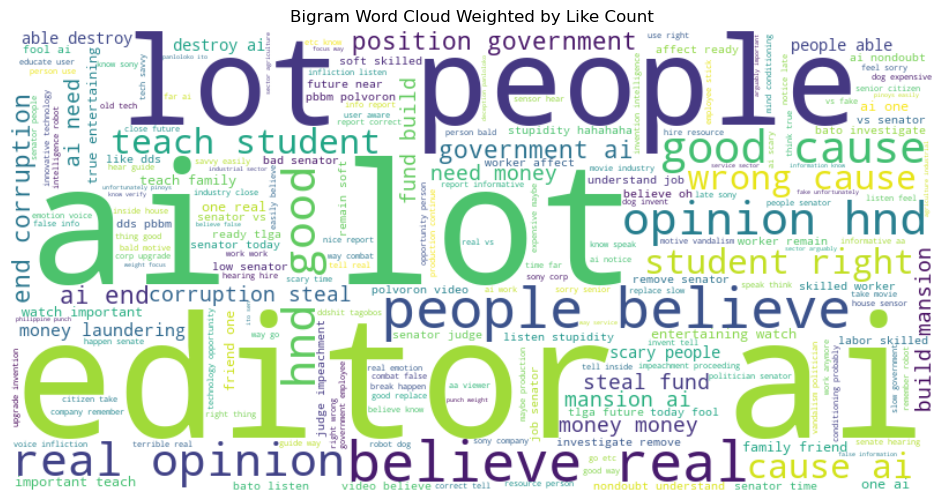

In [187]:
filtered_df = df_likes[df_likes['like_count'] > 50]

like_counts_list = filtered_df['like_count'].tolist()
bigram_list = filtered_df['bigrams'].astype(str).tolist()

print(like_counts_list, bigram_list)

import ast

parsed_bigrams = []
for b in bigram_list:
    if isinstance(b, str):
        parsed_bigrams.append(ast.literal_eval(b))
    else:
        parsed_bigrams.append(b)
expanded_bigrams = []
expanded_counts = []

for bigrams, count in zip(parsed_bigrams, like_counts_list):
    for b in bigrams:   # b = tuple ('editor','ai')
        expanded_bigrams.append(b)
        expanded_counts.append(count)

from wordcloud import WordCloud
import matplotlib.pyplot as plt

bigram_dict = {" ".join(b): c for b, c in zip(expanded_bigrams, expanded_counts)}

wc = WordCloud(width=800, height=400, background_color="white", colormap="viridis")
wc.generate_from_frequencies(bigram_dict)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Bigram Word Cloud Weighted by Like Count")
plt.show()



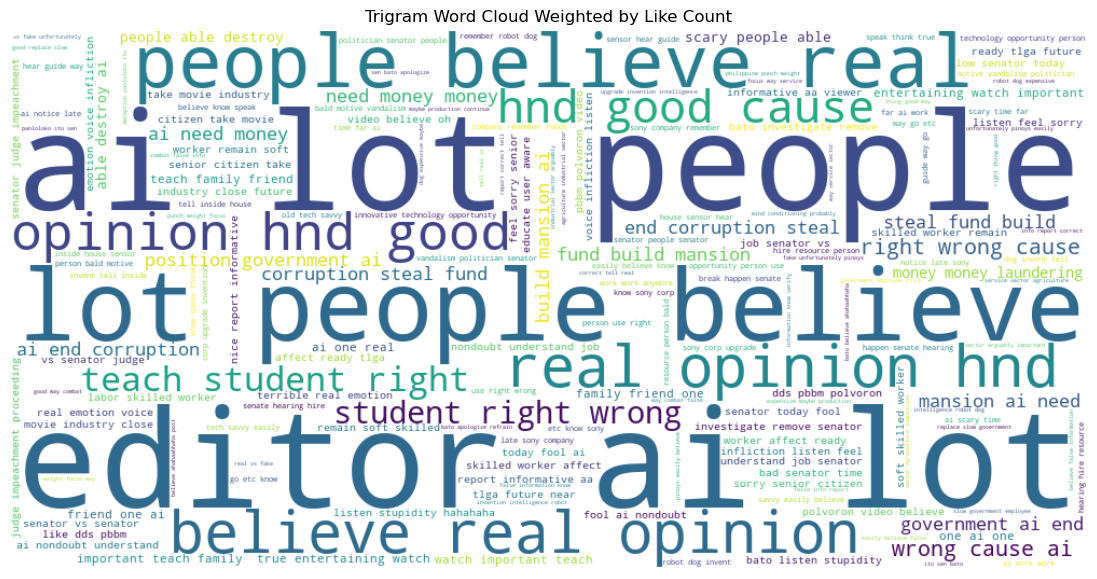

In [188]:
import ast
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# --- Filter df on like_count ---
filtered_df = df_likes[df_likes['like_count'] > 50]

like_counts_list = filtered_df['like_count'].tolist()
trigram_list = filtered_df['trigrams'].astype(str).tolist()

# --- Parse string repr of trigrams into real tuples ---
parsed_trigrams = []
for t in trigram_list:
    if isinstance(t, str):
        parsed_trigrams.append(ast.literal_eval(t))
    else:
        parsed_trigrams.append(t)

# --- Expand: align each trigram with its like_count ---
expanded_trigrams = []
expanded_counts = []

for trigrams, count in zip(parsed_trigrams, like_counts_list):
    for t in trigrams:   # t = tuple ('ai','is','powerful')
        expanded_trigrams.append(t)
        expanded_counts.append(count)

# --- Build dictionary for wordcloud ---
trigram_dict = {" ".join(t): c for t, c in zip(expanded_trigrams, expanded_counts)}

# --- Generate wordcloud ---
wc = WordCloud(width=1000, height=500, background_color="white", colormap="viridis")
wc.generate_from_frequencies(trigram_dict)

plt.figure(figsize=(14,7))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Trigram Word Cloud Weighted by Like Count")
plt.show()


In [189]:
df.head()

like_count     video_id                                    translated_text  \
0           0  QGlitcqjKyM  UR MY LIL SODA POP UR ALL I CAN THINK OF UR AL...   
1           0  QGlitcqjKyM  Dd5s will say "as long as the message is corre...   
2           0  QGlitcqjKyM    MICHAEL V. VICTIM OF DEEPFAKE VIDEO ENDORSEMENT   
3           0  QGlitcqjKyM                                Prg black mirror na   
4           0  QGlitcqjKyM  I watched it so badly with untrained eyes that...   

                                   lemmatized_tokens  \
0  ('UR', 'LIL', 'SODA', 'POP', 'UR', 'THINK', 'U...   
1  ('Dd5s', 'say', '``', 'long', 'message', 'corr...   
2  ('MICHAEL', 'V.', 'VICTIM', 'DEEPFAKE', 'VIDEO...   
3                   ('Prg', 'black', 'mirror', 'na')   
4  ('watched', 'badly', 'untrained', 'eye', 'seem...   

                             spacy_lemmatized_tokens             published  \
0  ('ur', 'LIL', 'SODA', 'POP', 'UR', 'think', 'u...  2025-09-07T14:08:44Z   
1  ('Dd5s', 'long', 'message', 'correct', 'AI', '...  2025-08-27T16:09:04Z   
2  ('MICHAEL', 'V.', 'VICTIM', 'DEEPFAKE', 'video...  2025-07-15T19:00:41Z   
3                   ('prg', 'black', 'mirror', 'na')  2025-06-18T04:33:24Z   
4     ('watch', 'badly', 'untrained', 'eye', 'real')  2025-06-14T02:16:50Z   

   len_tokens  len_spacy_tokens  \
0         108               116   
1          87                68   
2          63                63   
3          32                32   
4          58                46   

                                      cleaned_tokens  \
0  ['ur', 'lil', 'soda', 'pop', 'ur', 'think', 'u...   
1         ['long', 'message', 'correct', 'ai', 'ok']   
2  ['michael', 'victim', 'deepfake', 'video', 'en...   
3                   ['prg', 'black', 'mirror', 'na']   
4     ['watch', 'badly', 'untrained', 'eye', 'real']   

                                             bigrams  \
0  [('ur', 'lil'), ('lil', 'soda'), ('soda', 'pop...   
1  [('long', 'message'), ('message', 'correct'), ...   
2  [('michael', 'victim'), ('victim', 'deepfake')...   
3  [('prg', 'black'), ('black', 'mirror'), ('mirr...   
4  [('watch', 'badly'), ('badly', 'untrained'), (...   

                                            trigrams  
0  [('ur', 'lil', 'soda'), ('lil', 'soda', 'pop')...  
1  [('long', 'message', 'correct'), ('message', '...  
2  [('michael', 'victim', 'deepfake'), ('victim',...  
3  [('prg', 'black', 'mirror'), ('black', 'mirror...  
4  [('watch', 'badly', 'untrained'), ('badly', 'u...

In [190]:
df['published'] = pd.to_datetime(df['published'])

In [191]:
df['published'] = df['published'].dt.year

In [192]:
df['published'].value_counts()

published
2025    3077
2024    1082
2020      15
2021      13
2019       5
2022       4
2023       1
Name: count, dtype: int64

In [193]:
filtered_df_2025 = df[df['published'] == 2025]

In [194]:
filtered_df_2025

like_count     video_id  \
0              0  QGlitcqjKyM   
1              0  QGlitcqjKyM   
2              0  QGlitcqjKyM   
3              0  QGlitcqjKyM   
4              0  QGlitcqjKyM   
...          ...          ...   
4192           0  x4SvP-Ne-uY   
4193           0  x4SvP-Ne-uY   
4194           1  x4SvP-Ne-uY   
4195           0  x4SvP-Ne-uY   
4196           0  x4SvP-Ne-uY   

                                        translated_text  \
0     UR MY LIL SODA POP UR ALL I CAN THINK OF UR AL...   
1     Dd5s will say "as long as the message is corre...   
2       MICHAEL V. VICTIM OF DEEPFAKE VIDEO ENDORSEMENT   
3                                   Prg black mirror na   
4     I watched it so badly with untrained eyes that...   
...                                                 ...   
4192                                          haha! oyy   
4193                @@khoroshoigra8388 true, also a dev   
4194                                   true, also a dev   
4195  @@denniszenanywhere true. there's a company th...   
4196                         Jollibee is always Hiring.   

                                      lemmatized_tokens  \
0     ('UR', 'LIL', 'SODA', 'POP', 'UR', 'THINK', 'U...   
1     ('Dd5s', 'say', '``', 'long', 'message', 'corr...   
2     ('MICHAEL', 'V.', 'VICTIM', 'DEEPFAKE', 'VIDEO...   
3                      ('Prg', 'black', 'mirror', 'na')   
4     ('watched', 'badly', 'untrained', 'eye', 'seem...   
...                                                 ...   
4192                                    ('haha', 'oyy')   
4193        ('khoroshoigra8388', 'true', 'also', 'dev')   
4194                            ('true', 'also', 'dev')   
4195  ('denniszenanywhere', 'true', "'s", 'company',...   
4196                   ('Jollibee', 'always', 'Hiring')   

                                spacy_lemmatized_tokens  published  \
0     ('ur', 'LIL', 'SODA', 'POP', 'UR', 'think', 'u...       2025   
1     ('Dd5s', 'long', 'message', 'correct', 'AI', '...       2025   
2     ('MICHAEL', 'V.', 'VICTIM', 'DEEPFAKE', 'video...       2025   
3                      ('prg', 'black', 'mirror', 'na')       2025   
4        ('watch', 'badly', 'untrained', 'eye', 'real')       2025   
...                                                 ...        ...   
4192                                    ('haha', 'oyy')       2025   
4193              ('@@khoroshoigra8388', 'true', 'dev')       2025   
4194                                    ('true', 'dev')       2025   
4195  ('@@denniszenanywhere', 'true', 'company', 'le...       2025   
4196                             ('Jollibee', 'hiring')       2025   

      len_tokens  len_spacy_tokens  \
0            108               116   
1             87                68   
2             63                63   
3             32                32   
4             58                46   
...          ...               ...   
4192          15                15   
4193          43                37   
4194          23                15   
4195         186               166   
4196          32                22   

                                         cleaned_tokens  \
0     ['ur', 'lil', 'soda', 'pop', 'ur', 'think', 'u...   
1            ['long', 'message', 'correct', 'ai', 'ok']   
2     ['michael', 'victim', 'deepfake', 'video', 'en...   
3                      ['prg', 'black', 'mirror', 'na']   
4        ['watch', 'badly', 'untrained', 'eye', 'real']   
...                                                 ...   
4192                                    ['haha', 'oyy']   
4193                                    ['true', 'dev']   
4194                                    ['true', 'dev']   
4195  ['true', 'company', 'learn', 'lesson', 'hard',...   
4196                             ['jollibee', 'hiring']   

                                                bigrams  \
0     [('ur', 'lil'), ('lil', 'soda'), ('soda', 'pop...   
1     [('long', 'message'), ('message', 'correct'), ...   
2     [

In [195]:
filtered_df_2025['bigrams'] = filtered_df_2025['bigrams'].astype(str)
filtered_df_2025['trigrams'] = filtered_df_2025['trigrams'].astype(str)

C:\Users\Andreen Gonzaga\AppData\Local\Temp\ipykernel_45504\1476199321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_2025['bigrams'] = filtered_df_2025['bigrams'].astype(str)
C:\Users\Andreen Gonzaga\AppData\Local\Temp\ipykernel_45504\1476199321.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_2025['trigrams'] = filtered_df_2025['trigrams'].astype(str)


In [196]:
filtered_df_2025['bigrams']

0       [('ur', 'lil'), ('lil', 'soda'), ('soda', 'pop...
1       [('long', 'message'), ('message', 'correct'), ...
2       [('michael', 'victim'), ('victim', 'deepfake')...
3       [('prg', 'black'), ('black', 'mirror'), ('mirr...
4       [('watch', 'badly'), ('badly', 'untrained'), (...
                              ...                        
4192                                    [('haha', 'oyy')]
4193                                    [('true', 'dev')]
4194                                    [('true', 'dev')]
4195    [('true', 'company'), ('company', 'learn'), ('...
4196                             [('jollibee', 'hiring')]
Name: bigrams, Length: 3077, dtype: object

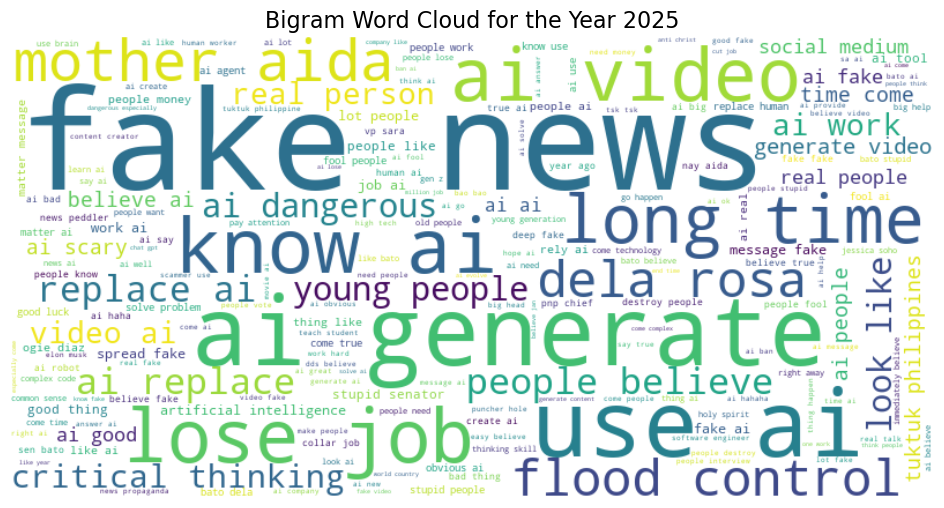

In [197]:
import ast
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk import FreqDist

# Step 1: Parse stringified lists/tuples into Python objects
parsed_bigrams = []
for item in filtered_df_2025['bigrams']:
    if isinstance(item, str):  # if it's a string like "[('ur','lil')]"
        parsed_bigrams.append(ast.literal_eval(item))
    else:
        parsed_bigrams.append(item)

# Step 2: Flatten into one list
all_bigrams = [bigram for sublist in parsed_bigrams for bigram in sublist]

# Step 3: Convert each tuple into "word1 word2"
joined_bigrams = [" ".join(b) for b in all_bigrams if isinstance(b, tuple) and len(b) == 2]

# Step 4: Count frequencies
bigram_counts = FreqDist(joined_bigrams)

# Step 5: Generate word cloud
wc = WordCloud(width=800, height=400, background_color="white", colormap="viridis")
wc.generate_from_frequencies(bigram_counts)

plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Bigram Word Cloud for the Year 2025", fontsize=16)
plt.show()


In [198]:
filtered_df_2025.shape

(3077, 11)

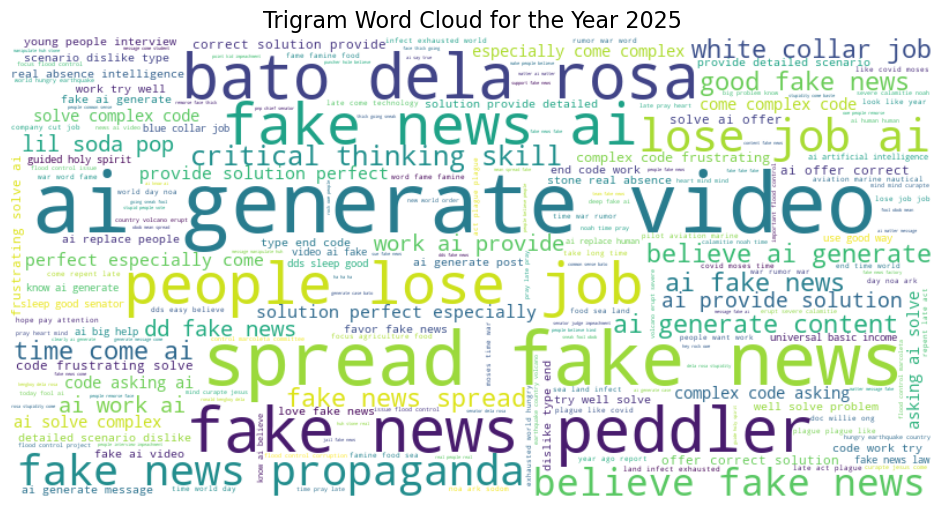

In [199]:
import ast
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk import FreqDist

# Step 1: Parse stringified lists/tuples into Python objects
parsed_trigrams = []
for item in filtered_df_2025['trigrams']:
    if isinstance(item, str):  # if it's a string like "[('word1','word2','word3')]"
        parsed_trigrams.append(ast.literal_eval(item))
    else:
        parsed_trigrams.append(item)

# Step 2: Flatten into one list
all_trigrams = [trigram for sublist in parsed_trigrams for trigram in sublist]

# Step 3: Convert each tuple into "word1 word2 word3"
joined_trigrams = [" ".join(t) for t in all_trigrams if isinstance(t, tuple) and len(t) == 3]

# Step 4: Count frequencies
trigram_counts = FreqDist(joined_trigrams)

# Step 5: Generate word cloud
wc = WordCloud(width=800, height=400, background_color="white", colormap="viridis")
wc.generate_from_frequencies(trigram_counts)

plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Trigram Word Cloud for the Year 2025", fontsize=16)
plt.show()


In [200]:
filtered_df_2024 = df[df['published'] == 2024]
filtered_df_2024['bigrams'] = filtered_df_2024['bigrams'].astype(str)
filtered_df_2024['trigrams'] = filtered_df_2024['trigrams'].astype(str)

C:\Users\Andreen Gonzaga\AppData\Local\Temp\ipykernel_45504\592147920.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_2024['bigrams'] = filtered_df_2024['bigrams'].astype(str)
C:\Users\Andreen Gonzaga\AppData\Local\Temp\ipykernel_45504\592147920.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_2024['trigrams'] = filtered_df_2024['trigrams'].astype(str)


In [201]:
filtered_df_2024.shape

(1082, 11)

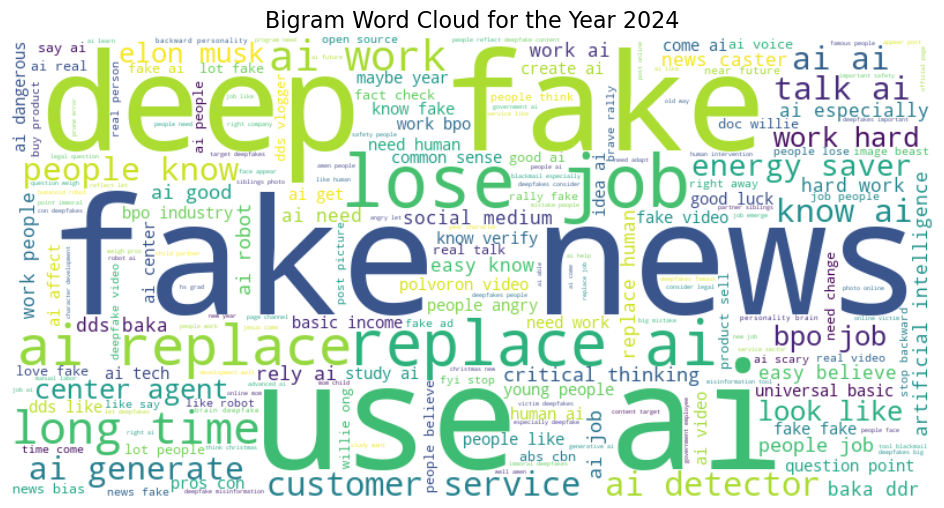

In [202]:
import ast
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk import FreqDist

# Step 1: Parse stringified lists/tuples into Python objects
parsed_bigrams = []
for item in filtered_df_2024['bigrams']:
    if isinstance(item, str):  # if it's a string like "[('ur','lil')]"
        parsed_bigrams.append(ast.literal_eval(item))
    else:
        parsed_bigrams.append(item)

# Step 2: Flatten into one list
all_bigrams = [bigram for sublist in parsed_bigrams for bigram in sublist]

# Step 3: Convert each tuple into "word1 word2"
joined_bigrams = [" ".join(b) for b in all_bigrams if isinstance(b, tuple) and len(b) == 2]

# Step 4: Count frequencies
bigram_counts = FreqDist(joined_bigrams)

# Step 5: Generate word cloud
wc = WordCloud(width=800, height=400, background_color="white", colormap="viridis")
wc.generate_from_frequencies(bigram_counts)

plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Bigram Word Cloud for the Year 2024", fontsize=16)
plt.show()


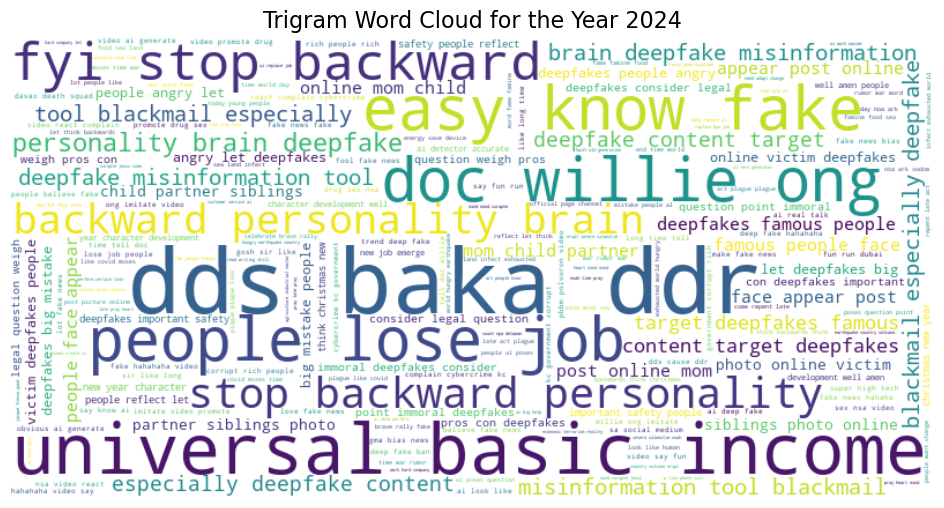

In [203]:
import ast
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk import FreqDist

# Step 1: Parse stringified lists/tuples into Python objects
parsed_trigrams = []
for item in filtered_df_2024['trigrams']:
    if isinstance(item, str):  # if it's a string like "[('word1','word2','word3')]"
        parsed_trigrams.append(ast.literal_eval(item))
    else:
        parsed_trigrams.append(item)

# Step 2: Flatten into one list
all_trigrams = [trigram for sublist in parsed_trigrams for trigram in sublist]

# Step 3: Convert each tuple into "word1 word2 word3"
joined_trigrams = [" ".join(t) for t in all_trigrams if isinstance(t, tuple) and len(t) == 3]

# Step 4: Count frequencies
trigram_counts = FreqDist(joined_trigrams)

# Step 5: Generate word cloud
wc = WordCloud(width=800, height=400, background_color="white", colormap="viridis")
wc.generate_from_frequencies(trigram_counts)

plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Trigram Word Cloud for the Year 2024", fontsize=16)
plt.show()


In [204]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [205]:
df.head()

like_count     video_id                                    translated_text  \
0           0  QGlitcqjKyM  UR MY LIL SODA POP UR ALL I CAN THINK OF UR AL...   
1           0  QGlitcqjKyM  Dd5s will say "as long as the message is corre...   
2           0  QGlitcqjKyM    MICHAEL V. VICTIM OF DEEPFAKE VIDEO ENDORSEMENT   
3           0  QGlitcqjKyM                                Prg black mirror na   
4           0  QGlitcqjKyM  I watched it so badly with untrained eyes that...   

                                   lemmatized_tokens  \
0  ('UR', 'LIL', 'SODA', 'POP', 'UR', 'THINK', 'U...   
1  ('Dd5s', 'say', '``', 'long', 'message', 'corr...   
2  ('MICHAEL', 'V.', 'VICTIM', 'DEEPFAKE', 'VIDEO...   
3                   ('Prg', 'black', 'mirror', 'na')   
4  ('watched', 'badly', 'untrained', 'eye', 'seem...   

                             spacy_lemmatized_tokens  published  len_tokens  \
0  ('ur', 'LIL', 'SODA', 'POP', 'UR', 'think', 'u...       2025         108   
1  ('Dd5s', 'long', 'message', 'correct', 'AI', '...       2025          87   
2  ('MICHAEL', 'V.', 'VICTIM', 'DEEPFAKE', 'video...       2025          63   
3                   ('prg', 'black', 'mirror', 'na')       2025          32   
4     ('watch', 'badly', 'untrained', 'eye', 'real')       2025          58   

   len_spacy_tokens                                     cleaned_tokens  \
0               116  ['ur', 'lil', 'soda', 'pop', 'ur', 'think', 'u...   
1                68         ['long', 'message', 'correct', 'ai', 'ok']   
2                63  ['michael', 'victim', 'deepfake', 'video', 'en...   
3                32                   ['prg', 'black', 'mirror', 'na']   
4                46     ['watch', 'badly', 'untrained', 'eye', 'real']   

                                             bigrams  \
0  [('ur', 'lil'), ('lil', 'soda'), ('soda', 'pop...   
1  [('long', 'message'), ('message', 'correct'), ...   
2  [('michael', 'victim'), ('victim', 'deepfake')...   
3  [('prg', 'black'), ('black', 'mirror'), ('mirr...   
4  [('watch', 'badly'), ('badly', 'untrained'), (...   

                                            trigrams  
0  [('ur', 'lil', 'soda'), ('lil', 'soda', 'pop')...  
1  [('long', 'message', 'correct'), ('message', '...  
2  [('michael', 'victim', 'deepfake'), ('victim',...  
3  [('prg', 'black', 'mirror'), ('black', 'mirror...  
4  [('watch', 'badly', 'untrained'), ('badly', 'u...

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from tqdm.notebook import trange

In [214]:
import ast

# Convert stringified lists to real lists
df['cleaned_tokens'] = df['cleaned_tokens'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

# Now join into sentences
df['processed_titles'] = df['cleaned_tokens'].apply(
    lambda x: " ".join(x) if isinstance(x, list) else ""
)


In [242]:
# Vectorize with simple CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['processed_titles'])
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [243]:
word_counts = X.toarray().sum(axis=0)
words = vectorizer.get_feature_names_out()
word_counts, words

(array([2, 1, 2, ..., 1, 1, 1], dtype=int64),
 array(['aa', 'aadick', 'aah', ..., 'zubil', 'àgarapalan', '𝚎𝚟𝚎𝚛𝚢𝚝𝚑𝚒𝚗g'],
       dtype=object))

In [244]:
# Create DataFrame and Sort
word_freq_df = pd.DataFrame({'word': words, 'count': word_counts})
word_freq_df = word_freq_df.sort_values(by='count', ascending=False)
word_freq_df.head(10)

word  count
144       ai   1696
3708  people    536
2924    like    367
1843    fake    349
2786    know    270
2680     job    252
5295     use    245
5497    work    233
5349   video    229
3406    news    227

In [245]:
# Number of words (features)
len(word_freq_df)

5581

In [246]:
# Number of words appearing only once
(word_freq_df['count'] == 1).sum()

2861

In [247]:
vectorizer = CountVectorizer(ngram_range=(2,2), stop_words='english')
X = vectorizer.fit_transform(df['processed_titles'])

# Get top bigrams
bigram_counts = X.toarray().sum(axis=0)
bigrams = vectorizer.get_feature_names_out()

# Show top 10 bigrams
bigram_df = pd.DataFrame({'bigram': bigrams, 'count': bigram_counts})
print(bigram_df.sort_values(by='count', ascending=False).head(10))

            bigram  count
7544     fake news    160
22092       use ai     73
820    ai generate     57
12716     lose job     45
11357      know ai     38
12618    long time     34
1090    ai replace     32
17590   replace ai     31
5525     deep fake     30
1231      ai video     30


In [222]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['processed_titles'])

df_words = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
word_sums = df_words.sum(axis=0).sort_values(ascending=False)
word_sums

ai             1696
people          536
like            367
fake            349
know            270
               ... 
industries        1
inefficient       1
inereste          1
infest            1
𝚎𝚟𝚎𝚛𝚢𝚝𝚑𝚒𝚗g        1
Length: 5581, dtype: int64

In [248]:
print(word_sums.describe())  # Check min/max frequencies

count    5581.000000
mean        5.985845
std        29.092073
min         1.000000
25%         1.000000
50%         1.000000
75%         4.000000
max      1696.000000
dtype: float64


In [256]:
vectorizer = TfidfVectorizer(
    stop_words='english', max_features=4000, min_df=5, ngram_range=(1,2)
)

X = vectorizer.fit_transform(df['processed_titles'])
pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

ability  able  abroad  abs  abs cbn  abuse  accept  accord  account  \
0         0.0   0.0     0.0  0.0      0.0    0.0     0.0     0.0      0.0   
1         0.0   0.0     0.0  0.0      0.0    0.0     0.0     0.0      0.0   
2         0.0   0.0     0.0  0.0      0.0    0.0     0.0     0.0      0.0   
3         0.0   0.0     0.0  0.0      0.0    0.0     0.0     0.0      0.0   
4         0.0   0.0     0.0  0.0      0.0    0.0     0.0     0.0      0.0   
...       ...   ...     ...  ...      ...    ...     ...     ...      ...   
4192      0.0   0.0     0.0  0.0      0.0    0.0     0.0     0.0      0.0   
4193      0.0   0.0     0.0  0.0      0.0    0.0     0.0     0.0      0.0   
4194      0.0   0.0     0.0  0.0      0.0    0.0     0.0     0.0      0.0   
4195      0.0   0.0     0.0  0.0      0.0    0.0     0.0     0.0      0.0   
4196      0.0   0.0     0.0  0.0      0.0    0.0     0.0     0.0      0.0   

      accountability  ...  yes  yes ai  young  young people  youth  youtube  \
0                0.0  ...  0.0     0.0    0.0           0.0    0.0      0.0   
1                0.0  ...  0.0     0.0    0.0           0.0    0.0      0.0   
2                0.0  ...  0.0     0.0    0.0           0.0    0.0      0.0   
3                0.0  ...  0.0     0.0    0.0           0.0    0.0      0.0   
4                0.0  ...  0.0     0.0    0.0           0.0    0.0      0.0   
...              ...  ...  ...     ...    ...           ...    ...      ...   
4192             0.0  ...  0.0     0.0    0.0           0.0    0.0      0.0   
4193             0.0  ...  0.0     0.0    0.0           0.0    0.0      0.0   
4194             0.0  ...  0.0     0.0    0.0           0.0    0.0      0.0   
4195             0.0  ...  0.0     0.0    0.0           0.0    0.0      0.0   
4196             0.0  ...  0.0     0.0    0.0           0.0    0.0      0.0   

      yrs   yt  yung  yup  
0     0.0  0.0   0.0  0.0  
1     0.0  0.0   0.0  0.0  
2     0.0  0.0   0.0  0.0  
3     0.0  0.0   0.0  0.0  
4     0.0  0.0   0.0  0.0  
...   ...  ...   ...  ...  
4192  0.0  0.0   0.0  0.0  
4193  0.0  0.0   0.0  0.0  
4194  0.0  0.0   0.0  0.0  
4195  0.0  0.0   0.0  0.0  
4196  0.0  0.0   0.0  0.0  

[4197 rows x 1462 columns]

In [257]:
df

like_count     video_id  \
0              0  QGlitcqjKyM   
1              0  QGlitcqjKyM   
2              0  QGlitcqjKyM   
3              0  QGlitcqjKyM   
4              0  QGlitcqjKyM   
...          ...          ...   
4192           0  x4SvP-Ne-uY   
4193           0  x4SvP-Ne-uY   
4194           1  x4SvP-Ne-uY   
4195           0  x4SvP-Ne-uY   
4196           0  x4SvP-Ne-uY   

                                        translated_text  \
0     UR MY LIL SODA POP UR ALL I CAN THINK OF UR AL...   
1     Dd5s will say "as long as the message is corre...   
2       MICHAEL V. VICTIM OF DEEPFAKE VIDEO ENDORSEMENT   
3                                   Prg black mirror na   
4     I watched it so badly with untrained eyes that...   
...                                                 ...   
4192                                          haha! oyy   
4193                @@khoroshoigra8388 true, also a dev   
4194                                   true, also a dev   
4195  @@denniszenanywhere true. there's a company th...   
4196                         Jollibee is always Hiring.   

                                      lemmatized_tokens  \
0     ('UR', 'LIL', 'SODA', 'POP', 'UR', 'THINK', 'U...   
1     ('Dd5s', 'say', '``', 'long', 'message', 'corr...   
2     ('MICHAEL', 'V.', 'VICTIM', 'DEEPFAKE', 'VIDEO...   
3                      ('Prg', 'black', 'mirror', 'na')   
4     ('watched', 'badly', 'untrained', 'eye', 'seem...   
...                                                 ...   
4192                                    ('haha', 'oyy')   
4193        ('khoroshoigra8388', 'true', 'also', 'dev')   
4194                            ('true', 'also', 'dev')   
4195  ('denniszenanywhere', 'true', "'s", 'company',...   
4196                   ('Jollibee', 'always', 'Hiring')   

                                spacy_lemmatized_tokens  published  \
0     ('ur', 'LIL', 'SODA', 'POP', 'UR', 'think', 'u...       2025   
1     ('Dd5s', 'long', 'message', 'correct', 'AI', '...       2025   
2     ('MICHAEL', 'V.', 'VICTIM', 'DEEPFAKE', 'video...       2025   
3                      ('prg', 'black', 'mirror', 'na')       2025   
4        ('watch', 'badly', 'untrained', 'eye', 'real')       2025   
...                                                 ...        ...   
4192                                    ('haha', 'oyy')       2025   
4193              ('@@khoroshoigra8388', 'true', 'dev')       2025   
4194                                    ('true', 'dev')       2025   
4195  ('@@denniszenanywhere', 'true', 'company', 'le...       2025   
4196                             ('Jollibee', 'hiring')       2025   

      len_tokens  len_spacy_tokens  \
0            108               116   
1             87                68   
2             63                63   
3             32                32   
4             58                46   
...          ...               ...   
4192          15                15   
4193          43                37   
4194          23                15   
4195         186               166   
4196          32                22   

                                         cleaned_tokens  \
0     [ur, lil, soda, pop, ur, think, ur, need, lil,...   
1                      [long, message, correct, ai, ok]   
2       [michael, victim, deepfake, video, endorsement]   
3                              [prg, black, mirror, na]   
4                  [watch, badly, untrained, eye, real]   
...                                                 ...   
4192                                        [haha, oyy]   
4193                                        [true, dev]   
4194                                        [true, dev]   
4195  [true, company, learn, lesson, hard, way, lose...   
4196                                 [jollibee, hiring]   

                                                bigrams  \
0     [('ur', 'lil'), ('lil', 'soda'), ('soda', 'pop...   
1     [('long', 'message'), ('message', 'correct'), ...   
2     [

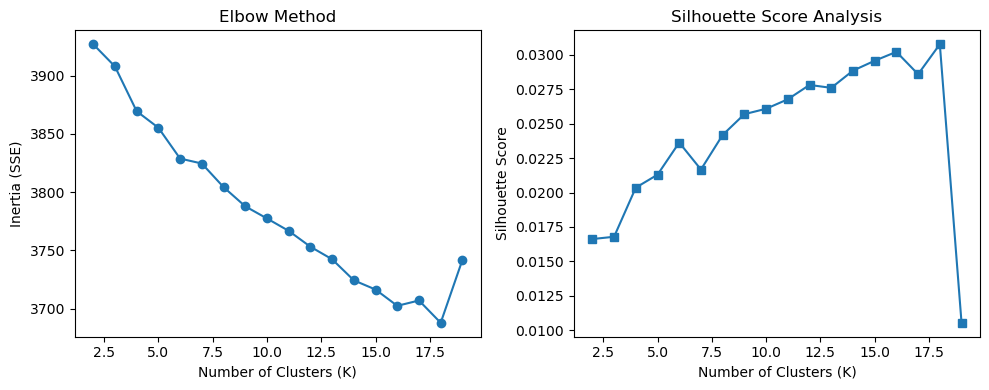

In [258]:
K_range = range(2, 20)

# Plot Elbow Method (Inertia)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method')

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='s', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Analysis')

plt.tight_layout()
plt.show()

In [259]:
def run_kmeans(k, scaled_data):
  kmeans_model = KMeans(n_clusters = k, random_state = 42, max_iter = 300)
  kmeans_model.fit(scaled_data)
  return kmeans_model.inertia_,kmeans_model.labels_

run_kmeans(6, X)

(3903.5802439693334, array([3, 3, 3, ..., 3, 0, 3]))

In [260]:
def optimize_kmeans(cluster_range=None, scaled_data=None):
  inertias = []
  labels = []
  silhouette_values = []
  for k in cluster_range:
    inertia, label = run_kmeans(k, X)
    inertias.append(inertia)
    labels.append(label)
    silhouette_values.append(silhouette_score(X, label))

  return inertias, labels, silhouette_values


In [261]:
from sklearn.metrics import silhouette_score
clusters = range(2,20)
inertia_values, labels, silhouette_values = optimize_kmeans(
    cluster_range = clusters,
    scaled_data= X
)

In [262]:
# First derivative of inertia
differences = np.diff(inertia_values)

# Second derivative
second_derivative = np.diff(differences)

# Index of max curvature
elbow_index = np.argmax(second_derivative) + 1  # +1 because of np.diff shift
print(f"The best elbow value (optimal number of clusters) is {clusters[elbow_index]}")


The best elbow value (optimal number of clusters) is 3


In [263]:
# Identify best k
best_k = 8
print(f"Optimal number of clusters: {best_k}")

# Train a K-Means model using best k
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X)

Optimal number of clusters: 8


In [264]:
df['cluster'].value_counts()

cluster
0    2426
4     804
3     244
7     201
2     165
5     161
6     134
1      62
Name: count, dtype: int64

In [265]:
def get_top_terms_per_cluster(kmeans_model, feature_names, num_terms=10):
    # Initialize a dictionary to store the top words for each cluster
    top_terms = {}

    # Loop through each cluster
    for cluster_id in range(kmeans_model.n_clusters):
        # Get the cluster center (vector of word importance scores)
        cluster_center = kmeans_model.cluster_centers_[cluster_id]

        # Find the indices of the top N words in the cluster
        top_word_indices = np.argsort(cluster_center)[-num_terms:]

        # Retrieve the actual words using the indices
        top_words = [feature_names[i] for i in top_word_indices]

        # Store the top words for the cluster
        top_terms[cluster_id] = top_words     
        
    return top_terms

feature_names = vectorizer.get_feature_names_out()
top_words = get_top_terms_per_cluster(kmeans, feature_names)

In [266]:
i = 7 # cluster

print(f'Top words: {top_words[i]}')
print('---'*35)
print(f'Article titles under cluster {i}')
df[df['cluster']==i]['processed_titles'].tolist()

Top words: ['believe', 'dds like', 'real', 'dds', 'people like', 'look', 'people', 'look like', 'ai', 'like']
---------------------------------------------------------------------------------------------------------
Article titles under cluster 7


['strange fb report thing like account block immediately',
 'dd like obvious fake account ai china fight filipinos',
 'dad victim people like facebook sell artist scam table worth',
 'desperate dds like',
 'company like meta x google want save',
 'cosmetic unauthorized medicine endorse deepfake adult watch like believe true',
 'gma news invent word ss public like spit fact',
 'lot animal come people serve choose thief survivor like election',
 'like gma bias news',
 'like search hitler speech english google ai',
 'discover long time notice innocent like hahaha',
 'person like easy know fake ordinary people educate ai especially social medium',
 'ddshit like spread deepfake lol',
 'charge criminal case like lifetime imprisonment',
 'like troll bbm peer',
 'filipino quick believe prove like election million',
 'filipino victim like believe fact check',
 'supporter bbm like tiktok',
 'source trust bro dds like',
 'like modern gossip modern hi tech vandalism time come love relationship',
 

In [268]:
df['cluster'].value_counts()

cluster
0    2426
4     804
3     244
7     201
2     165
5     161
6     134
1      62
Name: count, dtype: int64

like_count     video_id                                    translated_text  \
0           0  QGlitcqjKyM  UR MY LIL SODA POP UR ALL I CAN THINK OF UR AL...   
1           0  QGlitcqjKyM  Dd5s will say "as long as the message is corre...   
2           0  QGlitcqjKyM    MICHAEL V. VICTIM OF DEEPFAKE VIDEO ENDORSEMENT   
3           0  QGlitcqjKyM                                Prg black mirror na   
4           0  QGlitcqjKyM  I watched it so badly with untrained eyes that...   

                                   lemmatized_tokens  \
0  ('UR', 'LIL', 'SODA', 'POP', 'UR', 'THINK', 'U...   
1  ('Dd5s', 'say', '``', 'long', 'message', 'corr...   
2  ('MICHAEL', 'V.', 'VICTIM', 'DEEPFAKE', 'VIDEO...   
3                   ('Prg', 'black', 'mirror', 'na')   
4  ('watched', 'badly', 'untrained', 'eye', 'seem...   

                             spacy_lemmatized_tokens  published  len_tokens  \
0  ('ur', 'LIL', 'SODA', 'POP', 'UR', 'think', 'u...       2025         108   
1  ('Dd5s', 'long', 'message', 'correct', 'AI', '...       2025          87   
2  ('MICHAEL', 'V.', 'VICTIM', 'DEEPFAKE', 'video...       2025          63   
3                   ('prg', 'black', 'mirror', 'na')       2025          32   
4     ('watch', 'badly', 'untrained', 'eye', 'real')       2025          58   

   len_spacy_tokens                                     cleaned_tokens  \
0               116  [ur, lil, soda, pop, ur, think, ur, need, lil,...   
1                68                   [long, message, correct, ai, ok]   
2                63    [michael, victim, deepfake, video, endorsement]   
3                32                           [prg, black, mirror, na]   
4                46               [watch, badly, untrained, eye, real]   

                                             bigrams  \
0  [('ur', 'lil'), ('lil', 'soda'), ('soda', 'pop...   
1  [('long', 'message'), ('message', 'correct'), ...   
2  [('michael', 'victim'), ('victim', 'deepfake')...   
3  [('prg', 'black'), ('black', 'mirror'), ('mirr...   
4  [('watch', 'badly'), ('badly', 'untrained'), (...   

                                            trigrams  \
0  [('ur', 'lil', 'soda'), ('lil', 'soda', 'pop')...   
1  [('long', 'message', 'correct'), ('message', '...   
2  [('michael', 'victim', 'deepfake'), ('victim',...   
3  [('prg', 'black', 'mirror'), ('black', 'mirror...   
4  [('watch', 'badly', 'untrained'), ('badly', 'u...   

                                    processed_titles  cluster  
0  ur lil soda pop ur think ur need lil soda pop ...        0  
1                         long message correct ai ok        4  
2          michael victim deepfake video endorsement        0  
3                                prg black mirror na        0  
4                     watch badly untrained eye real        0